## Impact of weather on daily air traffic at the Paphos International Airport, Cyprus. 

#### Table of Content:


* [1. Introduction](#1-introducation)
* [2. Methods](#2-methods)
    * [2.1 Data Source Details](#21-data-source-deatils)
    * [2.2 Project Structure](#22-project-structure)
        * [2.2.1 ETL for Air Traffic Data](#221-etl-for-air-traffic-data)
        * [2.2.2 ETL for Weather Data](#222-etl-for-weather-data)
* [3. Result & Analysis](#3-result--analysis)
    * [3.1 Installing Dependencies](#31-installing-dependecies)
    * [3.2 Data Presentation](#32-data-presentation)
        * [3.2.1 Import Packages](#321-import-packages)
        * [3.2.2 Load Data](#322-load-data)
        * [3.2.3 Data Descriptions](#323-data-descriptions)
            * [3.2.3.ATD Daily Air Traffic Data](#323atd-daily-air-traffic-data)
            * [3.2.3.WD Weather Data](#323wd-weather-data)
            * [3.2.3.CD Combined Data](#323cd-combined-data)
* [4. Discussion and Conclusion](#4-discussion-and-conclusion)
    * [4.1 Discussion - Q&A](#41-discussion---qa)
    * [4.2 Conclusion](#42-conclusion)




## 1. Introducation

The Paphos International Airport plays a crucial role in connecting Cyprus to the global network of air travel. As a vital transportation hub, it is essential to understand how daily air traffic at this airport is influenced by weather conditions. This data science project focuses on analyzing the relationship between weather patterns and air traffic to provide valuable insights for airlines, passengers, and decision-makers. By examining these factors, we aim to help stakeholders better plan and manage their operations, ultimately benefiting Cyprus's economy and promoting efficient and safe air travel.

Now, the question that interests us is: How do the weather conditions in Paphos International Airport impact air traffic throughout the year? And we will try to answer this question by focusing on several short questions.


1. How does the air traffic volume at Paphos International Airport vary throughout the year?
2. How does the wind speed at Paphos International Airport vary throughout the year?
3. Does wind speed effect air traffic volume at Paphos International Airport?
4. How does the wind direction at Paphos International Airport vary throughout the year?
5. Does wind direction effect air traffic volume at Paphos International Airport?
6. How does the temperature at Paphos International Airport vary throughout the year?
7. Does temperature effect air traffic volume at Paphos International Airport?
8. Is there any relation between the average sea-level air pressure on the total air traffic at Paphos International Airport?


## 2. Methods

### 2.1. Data Source Deatils:
    
To answer those questions for this project we are using two open data sources: [European Data Portal](https://data.europa.eu/data/datasets/64a4860b-e33b-4dec-9738-bbadb5c0fe8c?locale=en), which contains information on air traffic in Paphos International Airport, and [meteostat](https://meteostat.net/en/), which provides daily weather and climate data of Paphos International Airport.

#### Datasource 1: European Data Portal - Daily Air Traffic at Paphos Airport
##### Metadata URL: https://data.europa.eu/en
##### Sample Data URL: https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fwww.data.gov.cy%2Fsites%2Fdefault%2Ffiles%2FPAFOS%2520AIRPORT%2520DAILY%2520AIR%2520TRAFFIC%25202019.xlsx&wdOrigin=BROWSELINK
##### Data Type: XLSX
##### Data Descriptions:
In this data source contains daily air traffic data of Paphos International Airport divided by monthly basis. Data includes tanding and take-off count of both the international and national flights. This dataset also takes into account the transit flights and helicopters landing and take-off information. For the project I have used the montly data of the years 2018, 2019, 2020 and 2021.

#### Datasource 2: Meteostat Developers - Daily weather data of Paphos International Airport of Cyprus
##### Metadata URL: https://dev.meteostat.net/bulk/daily.html#endpoints
Sample Data URL: https://bulk.meteostat.net/v2/daily/{station}.csv.gz (Station-id of Paphos Airport = '17600')
##### Data Type: CSV
##### Data Descriptions:
This data source will provide daily weather and climate data of Paphos Airport that includes average air temperature, daily minimum and maximum air temperature, monthly precipitation total, maximum snow depth, average wind direction and speed, peak wind gust, average sea-level air pressure, and monthly sunshine total. 

### 2.2. Project Structure:

The project follows a structured ETL (Extract, Transform, Load) pipeline approach, encompassing various directories and modules with specific functionalities. The "etl_main.py" serves as the entry point for running the pipeline using the command "python ./project/etl_main.py", resulting in the generation of the final dataset stored in an SQLite database named as "project.sqlite".

![ETL Pipeline Diagram](./ETL%20Pipeline%20Diagram.png)

#### 2.2.1 ETL for Air Traffic Data:
- E: Extraction: For this project from the data source (europa) we extracted daily air traffic data using "extractor.py" of Paphos International Airport from the site for the year [2018, 2019, 2020, 2021] into a 4 separate tables named "airports_daily_traffic_{year}" in the database from 4 different URL of respectives years. As the URL's are almost same except the year for the datasource we used same URL and replaced the year value from the pre-defined year list. In the data source the data were saved in 12 sheets (based on months) in one xlsx file for each years. So for each year combined all the data from the 12 sheets into one single table for each year and extracted the data and sheet name (months names) from the source and processed it for further transformations in "transformation.py". Used pandas.ExcelFile() for extracting the xlsx data into the air traffic dataframe.

- T: Transformation: From the extracted sheet name list we saw that there are inconsistency in the name of months (May, June, July). So, first replaced the month of those three months in similar form of other months. As we did not had proper date column in the data source so used the 'DAY' column from the data as DAY of the date, sheet name as Month of the Date and Year value of the current URL as Year value of the Date. Then in next step as newly created date column has "2018-JAN-01" format of the date, thus changed the format to the "%Y-%m-%d" or "2018-01-01" to match with the date format of weather data. In the next step as the headings were not clear enough from the source data, headers of the data has been renamed in clear form using the function airDataHeaderRename(). Then, we changed the newly created "Date" column into a column index zero. In the end, dropped all the rows when the total sum of daily traffic in the airport was zero as the whole row were null. aAs while extracting the data there were 31 days for each month, have those garbage value. Used cleanATD() funtion to clean the unwanted data. Finally, returns the dataframe for loading into the database. 

- L: Load Data: To load the transformed air traffic data we used 'sqlite3' as a database ("project.sqlite") in "loader.py". And for daily air traffic data from 4 URL generated 4 transformed dataframes which later loaded as a 4 separate tables named "airports_daily_traffic_{year}" in the database. Used to_sql() function to load the dataframes into the database as a table. Also used pre-defined data_types to make sure the data types each column remains the same as source/dataframe into the database table. 



#### 2.2.2 ETL for Weather Data:
- E: Extraction: For the project we exctracted Paphos weather station data from the data source (meteostat) and sved it to the weather dataframe for further transformations. As the datasource file is in csv formet and "gzip" compressed form, used pandas.read_csv() to extract the data into a dataframe also mentioning the compression type in the function. Later, sent the dataframe for the transformation.

- T: Transformation: From extracted daily weather data we have seen that the header of the tables were not assigned, thus at first we assigned the headers to the data and fix the structural problem in the dataset using weatherDataAddHeader(). Then re-formatted the "Date" column according to the format to match the Date column in Air Traffic Data to "%Y-%m-%d".In the next step, As the extracted dataframe has data from 1989 to updated ate thus we had to drop irrelevant data from the table so we dropped all the data except the year [2018, 2019, 2020, 2021] which are relevants to the project using weatherDataFilter() function. Then, changed the "Date" column data type from string to date format. Finally, the dataframe is ready to load. 

- L: Load Data: To load the transformed daily weather data we used 'sqlite3' as a database ("project.sqlite") in "loader.py". In the database "project.sqlite" we created a new table named "daily_weather_data" and loaded the transformed dataframe into the table using the to_sql() function. Also used pre-defined data_types to make sure the data types each column remains the same as source/dataframe into the database table. 



## 3. Result & Analysis:

### 3.1 Installing Dependecies
<div class="alert alert-block alert-info">
<b>

To install the dependencies for this project, run the following command to install the dependencies specified in the requirements.txt file: 

pip install -r requirements.txt

</div>

In [388]:
# Installing Visualization Library
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### 3.2. Data Presentation:

#### 3.2.1 Import Packages

In [389]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') ## to remove any warnings

#### 3.2.2 Load Data

In [390]:
years = [2018,2019,2020,2021]
relative_path = "../data/project.sqlite"
db_path = os.path.abspath(relative_path)

conn = sqlite3.connect(db_path)
airports_daily_traffic_dfs = {}

weather_data_df = pd.read_sql_query(f"SELECT * FROM daily_weather_data", conn)

for year in years:
    airports_daily_traffic_dfs[year] = pd.read_sql_query(f"SELECT * FROM airports_daily_traffic_{year}", conn)

#### 3.2.3 Data Descriptions
This section focuses on exploring two sets of data further: [Daily Air Traffic Data](https://data.europa.eu/data/datasets/64a4860b-e33b-4dec-9738-bbadb5c0fe8c?locale=en) of Paphos International Airport and [Meteostat Weather and Climate Data](https://dev.meteostat.net/bulk/daily.html#endpoints) of Paphos.
##### 3.2.3.ATD. Daily Air Traffic Data
Air Traffic Data description of Paphos International Airport.

In [391]:
airports_daily_traffic_dfs[2018].head()

,Date,Day,IntlLandings_R11,IntlLandings_R29,IntlLandings_TTL,IntlTakeOffs_R11,IntlTakeOffs_R29,IntlTakeOffs_TTL,DomsLandings_R11,DomsLandings_R29,...,DomsTakeOffs_R29,DomsTakeOffs_TTL,TransitA/C,TransitHEL,TransitTTL,HeliCopLND,HeliCopT/O,HeliCopTTL,T/G,TotalSum(TTL)
0,2018-01-01,1,1.0,7.0,8.0,0.0,8.0,8,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
1,2018-01-02,2,1.0,10.0,11.0,0.0,10.0,10,0.0,2.0,...,2.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0
2,2018-01-03,3,11.0,9.0,20.0,6.0,15.0,21,1.0,0.0,...,1.0,1,0.0,0.0,0.0,5.0,5.0,10.0,0.0,53.0
3,2018-01-04,4,1.0,11.0,12.0,0.0,11.0,11,0.0,0.0,...,0.0,0,0.0,0.0,0.0,2.0,2.0,4.0,0.0,27.0
4,2018-01-05,5,1.0,7.0,8.0,0.0,10.0,10,0.0,1.0,...,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0


-  Now, Merging the daily airport dataframes of year 2018,2019,2020 & 2021 into one dataframe for further analysis.

In [392]:
pieces = {2018: airports_daily_traffic_dfs[2018], 2019: airports_daily_traffic_dfs[2019], 2020: airports_daily_traffic_dfs[2020], 2021: airports_daily_traffic_dfs[2021]}

merged_airports_traffic_df = pd.concat(pieces)

In [393]:
merged_airports_traffic_df.head()

Date Day  IntlLandings_R11  IntlLandings_R29  IntlLandings_TTL  \
2018 0  2018-01-01   1               1.0               7.0               8.0   
     1  2018-01-02   2               1.0              10.0              11.0   
     2  2018-01-03   3              11.0               9.0              20.0   
     3  2018-01-04   4               1.0              11.0              12.0   
     4  2018-01-05   5               1.0               7.0               8.0   

        IntlTakeOffs_R11  IntlTakeOffs_R29  IntlTakeOffs_TTL  \
2018 0               0.0               8.0                 8   
     1               0.0              10.0                10   
     2               6.0              15.0                21   
     3               0.0              11.0                11   
     4               0.0              10.0                10   

        DomsLandings_R11  DomsLandings_R29  ...  DomsTakeOffs_TTL  TransitA/C  \
2018 0               0.0               0.0  ...                 0         0.0   
     1               0.0               2.0  ...                 2         0.0   
     2               1.0               0.0  ...                 1         0.0   
     3               0.0               0.0  ...                 0         0.0   
     4               0.0               1.0  ...                 1         0.0   

        TransitHEL  TransitTTL  HeliCopLND  HeliCopT/O  HeliCopTTL  T/G  \
2018 0         0.0         0.0         0.0         0.0         0.0  0.0   
     1         0.0         0.0         0.0         0.0         0.0  0.0   
     2         0.0         0.0         5.0         5.0        10.0  0.0   
     3         0.0         0.0         2.0         2.0         4.0  0.0   
     4         0.0         0.0         0.0         0.0         0.0  0.0   

        TotalSum(TTL)  INIT.  
2018 0           16.0    NaN  
     1           25.0    NaN  
     2           53.0    NaN  
     3           27.0    NaN  
     4           20.0    NaN  

[5 rows x 23 columns]

In [394]:
merged_airports_traffic_df.shape

(1502, 23)

In [395]:
merged_airports_traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1502 entries, (2018, 0) to (2021, 376)
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1454 non-null   object 
 1   Day               1502 non-null   object 
 2   IntlLandings_R11  1502 non-null   float64
 3   IntlLandings_R29  1502 non-null   float64
 4   IntlLandings_TTL  1502 non-null   float64
 5   IntlTakeOffs_R11  1502 non-null   float64
 6   IntlTakeOffs_R29  1502 non-null   float64
 7   IntlTakeOffs_TTL  1502 non-null   int64  
 8   DomsLandings_R11  1501 non-null   float64
 9   DomsLandings_R29  1501 non-null   float64
 10  DomsLandings_TTL  1502 non-null   float64
 11  DomsTakeOffs_R11  1501 non-null   float64
 12  DomsTakeOffs_R29  1501 non-null   float64
 13  DomsTakeOffs_TTL  1502 non-null   int64  
 14  TransitA/C        1501 non-null   float64
 15  TransitHEL        1499 non-null   float64
 16  TransitTTL        1502 non-

- As daily air traffic data has insignificant INIT column from table 2020, we will get rid of that column from the merged datafmraes for analysis. 

In [396]:
merged_airports_traffic_df = merged_airports_traffic_df.drop(["INIT."], axis = 1)

In [397]:
merged_airports_traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1502 entries, (2018, 0) to (2021, 376)
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1454 non-null   object 
 1   Day               1502 non-null   object 
 2   IntlLandings_R11  1502 non-null   float64
 3   IntlLandings_R29  1502 non-null   float64
 4   IntlLandings_TTL  1502 non-null   float64
 5   IntlTakeOffs_R11  1502 non-null   float64
 6   IntlTakeOffs_R29  1502 non-null   float64
 7   IntlTakeOffs_TTL  1502 non-null   int64  
 8   DomsLandings_R11  1501 non-null   float64
 9   DomsLandings_R29  1501 non-null   float64
 10  DomsLandings_TTL  1502 non-null   float64
 11  DomsTakeOffs_R11  1501 non-null   float64
 12  DomsTakeOffs_R29  1501 non-null   float64
 13  DomsTakeOffs_TTL  1502 non-null   int64  
 14  TransitA/C        1501 non-null   float64
 15  TransitHEL        1499 non-null   float64
 16  TransitTTL        1502 non-

-  From the data we can see that there is a rows where Date is None and Day = "TTL", which means the total count of the month. so we will create a new dataframe out of those total count rows.

Filling null values of date column for total count columns before creating a new dataframe with total counts.

In [398]:
# filling null values
merged_airports_traffic_df.fillna(method='ffill', inplace=True)
merged_airports_traffic_df.tail()

Date  Day  IntlLandings_R11  IntlLandings_R29  \
2021 372  2021-12-28   28               4.0              18.0   
     373  2021-12-29   29              22.0               2.0   
     374  2021-12-30   30              18.0               0.0   
     375  2021-12-31   31              19.0               0.0   
     376  2021-12-31  TTL             239.0             400.0   

          IntlLandings_TTL  IntlTakeOffs_R11  IntlTakeOffs_R29  \
2021 372              22.0               0.0              23.0   
     373              24.0              17.0               5.0   
     374              18.0              18.0               1.0   
     375              19.0              21.0               0.0   
     376             639.0             212.0             433.0   

          IntlTakeOffs_TTL  DomsLandings_R11  DomsLandings_R29  ...  \
2021 372                23               0.0               7.0  ...   
     373                22               1.0               1.0  ...   
     374                19               2.0               0.0  ...   
     375                21               1.0               0.0  ...   
     376               645              16.0              33.0  ...   

          DomsTakeOffs_R29  DomsTakeOffs_TTL  TransitA/C  TransitHEL  \
2021 372               7.0                 7         1.0         0.0   
     373               0.0                 2         1.0         0.0   
     374               0.0                 2         0.0         0.0   
     375               0.0                 1         0.0         0.0   
     376              33.0                49        27.0         2.0   

          TransitTTL  HeliCopLND  HeliCopT/O  HeliCopTTL   T/G  TotalSum(TTL)  
2021 372         1.0         5.0         5.0        10.0   0.0           70.0  
     373         1.0         7.0         7.0        14.0   1.0           66.0  
     374         0.0         3.0         3.0         6.0   0.0           47.0  
     375         0.0         0.0         0.0         0.0   0.0           42.0  
     376        29.0       119.0       119.0       238.0  39.0         1688.0  

[5 rows x 22 columns]

Creating a dataframe for total traffic by months

In [399]:
merged_airports_TTL_traffic_df = merged_airports_traffic_df[merged_airports_traffic_df['Day'] == 'TTL']
merged_airports_TTL_traffic_df.head()

Date  Day  IntlLandings_R11  IntlLandings_R29  \
2018 31   2018-01-31  TTL              80.0             236.0   
     60   2018-02-28  TTL             102.0             236.0   
     92   2018-03-31  TTL             146.0             407.0   
     123  2018-04-30  TTL             178.0             654.0   
     155  2018-05-31  TTL             137.0             897.0   

          IntlLandings_TTL  IntlTakeOffs_R11  IntlTakeOffs_R29  \
2018 31              316.0              24.0             293.0   
     60              338.0              64.0             274.0   
     92              553.0              99.0             453.0   
     123             832.0             105.0             727.0   
     155            1034.0              94.0             933.0   

          IntlTakeOffs_TTL  DomsLandings_R11  DomsLandings_R29  ...  \
2018 31                317               5.0              29.0  ...   
     60                338               1.0               3.0  ...   
     92                552               5.0              23.0  ...   
     123               832               2.0              29.0  ...   
     155              1027               8.0              59.0  ...   

          DomsTakeOffs_R29  DomsTakeOffs_TTL  TransitA/C  TransitHEL  \
2018 31               31.0                35        27.0         2.0   
     60                3.0                 3        18.0         1.0   
     92               26.0                29        26.0        11.0   
     123              29.0                31        20.0         7.0   
     155              60.0                68        31.0        12.0   

          TransitTTL  HeliCopLND  HeliCopT/O  HeliCopTTL    T/G  TotalSum(TTL)  
2018 31         29.0       119.0       119.0       238.0   49.0         1018.0  
     60         19.0       106.0       106.0       212.0   45.0          959.0  
     92         37.0       139.0       139.0       278.0   70.0         1547.0  
     123        27.0       136.0       136.0       272.0   41.0         2066.0  
     155        43.0       147.0       147.0       294.0  113.0         2646.0  

[5 rows x 22 columns]

In [400]:
merged_airports_TTL_traffic_df.shape

(48, 22)

Changing the Date column of the month to "%Y-%M-%D" format to "%Month-%Year" format.

In [401]:
#Changing Date Formation for Monthly Total
merged_airports_TTL_traffic_df.loc[:,'Date'] = pd.to_datetime(merged_airports_TTL_traffic_df['Date'])
merged_airports_TTL_traffic_df.loc[:,'Date'] = merged_airports_TTL_traffic_df['Date'].dt.strftime('%b %Y')
merged_airports_TTL_traffic_df.head()

Date  Day  IntlLandings_R11  IntlLandings_R29  IntlLandings_TTL  \
2018 31   Jan 2018  TTL              80.0             236.0             316.0   
     60   Feb 2018  TTL             102.0             236.0             338.0   
     92   Mar 2018  TTL             146.0             407.0             553.0   
     123  Apr 2018  TTL             178.0             654.0             832.0   
     155  May 2018  TTL             137.0             897.0            1034.0   

          IntlTakeOffs_R11  IntlTakeOffs_R29  IntlTakeOffs_TTL  \
2018 31               24.0             293.0               317   
     60               64.0             274.0               338   
     92               99.0             453.0               552   
     123             105.0             727.0               832   
     155              94.0             933.0              1027   

          DomsLandings_R11  DomsLandings_R29  ...  DomsTakeOffs_R29  \
2018 31                5.0              29.0  ...              31.0   
     60                1.0               3.0  ...               3.0   
     92                5.0              23.0  ...              26.0   
     123               2.0              29.0  ...              29.0   
     155               8.0              59.0  ...              60.0   

          DomsTakeOffs_TTL  TransitA/C  TransitHEL  TransitTTL  HeliCopLND  \
2018 31                 35        27.0         2.0        29.0       119.0   
     60                  3        18.0         1.0        19.0       106.0   
     92                 29        26.0        11.0        37.0       139.0   
     123                31        20.0         7.0        27.0       136.0   
     155                68        31.0        12.0        43.0       147.0   

          HeliCopT/O  HeliCopTTL    T/G  TotalSum(TTL)  
2018 31        119.0       238.0   49.0         1018.0  
     60        106.0       212.0   45.0          959.0  
     92        139.0       278.0   70.0         1547.0  
     123       136.0       272.0   41.0         2066.0  
     155       147.0       294.0  113.0         2646.0  

[5 rows x 22 columns]

In [402]:
merged_airports_TTL_traffic_df.describe()

,IntlLandings_R11,IntlLandings_R29,IntlLandings_TTL,IntlTakeOffs_R11,IntlTakeOffs_R29,IntlTakeOffs_TTL,DomsLandings_R11,DomsLandings_R29,DomsLandings_TTL,DomsTakeOffs_R11,DomsTakeOffs_R29,DomsTakeOffs_TTL,TransitA/C,TransitHEL,TransitTTL,HeliCopLND,HeliCopT/O,HeliCopTTL,T/G,TotalSum(TTL)
count,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,98.916667,536.500000,635.416667,61.56250,573.666667,635.229167,7.625000,48.812500,56.312500,7.916667,48.520833,56.333333,40.583333,7.020833,47.604167,152.020833,151.583333,303.604167,55.375000,1789.875000
std,76.350768,363.197795,378.414882,57.61239,370.010542,378.628445,9.395846,30.581357,30.600484,8.812065,30.233833,30.335944,22.856475,5.479127,26.249004,52.921656,51.683914,104.564902,29.581208,802.260148
min,1.000000,4.000000,6.000000,0.00000,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,9.000000,56.000000,54.000000,110.000000,7.000000,249.000000
25%,40.500000,252.250000,337.000000,20.25000,296.000000,336.000000,1.750000,29.000000,35.750000,2.750000,27.750000,36.750000,26.750000,3.000000,28.750000,117.750000,118.000000,235.750000,37.750000,1085.250000
50%,73.500000,454.000000,567.000000,31.50000,503.500000,567.500000,5.000000,44.000000,53.000000,4.000000,45.000000,53.000000,35.000000,6.000000,42.500000,140.500000,140.500000,281.000000,55.000000,1765.500000
75%,150.250000,952.250000,1038.000000,99.25000,989.250000,1040.750000,8.250000,60.500000,71.500000,9.750000,60.500000,71.250000,55.000000,11.000000,59.500000,171.000000,172.750000,343.750000,70.250000,2624.750000
max,322.000000,1086.000000,1234.000000,252.00000,1147.000000,1227.000000,46.000000,166.000000,167.000000,44.000000,162.000000,164.000000,100.000000,25.000000,123.000000,327.000000,310.000000,634.000000,131.000000,3034.000000


The describe() function was used to generate descriptive statistics for the numerical columns in the dataset, including count, mean, standard deviation, minimum, quartiles, and maximum values.

- Now, we will create a dataframe for daily traffic from the merged airport traffic dataframe by exclud all the monthly total rows (where "DAY" column value is "TTL")

In [403]:
merged_airports_dailytraffic_df = merged_airports_traffic_df[merged_airports_traffic_df['Day'] != 'TTL']
merged_airports_dailytraffic_df.head()

Date Day  IntlLandings_R11  IntlLandings_R29  IntlLandings_TTL  \
2018 0  2018-01-01   1               1.0               7.0               8.0   
     1  2018-01-02   2               1.0              10.0              11.0   
     2  2018-01-03   3              11.0               9.0              20.0   
     3  2018-01-04   4               1.0              11.0              12.0   
     4  2018-01-05   5               1.0               7.0               8.0   

        IntlTakeOffs_R11  IntlTakeOffs_R29  IntlTakeOffs_TTL  \
2018 0               0.0               8.0                 8   
     1               0.0              10.0                10   
     2               6.0              15.0                21   
     3               0.0              11.0                11   
     4               0.0              10.0                10   

        DomsLandings_R11  DomsLandings_R29  ...  DomsTakeOffs_R29  \
2018 0               0.0               0.0  ...               0.0   
     1               0.0               2.0  ...               2.0   
     2               1.0               0.0  ...               1.0   
     3               0.0               0.0  ...               0.0   
     4               0.0               1.0  ...               1.0   

        DomsTakeOffs_TTL  TransitA/C  TransitHEL  TransitTTL  HeliCopLND  \
2018 0                 0         0.0         0.0         0.0         0.0   
     1                 2         0.0         0.0         0.0         0.0   
     2                 1         0.0         0.0         0.0         5.0   
     3                 0         0.0         0.0         0.0         2.0   
     4                 1         0.0         0.0         0.0         0.0   

        HeliCopT/O  HeliCopTTL  T/G  TotalSum(TTL)  
2018 0         0.0         0.0  0.0           16.0  
     1         0.0         0.0  0.0           25.0  
     2         5.0        10.0  0.0           53.0  
     3         2.0         4.0  0.0           27.0  
     4         0.0         0.0  0.0           20.0  

[5 rows x 22 columns]

In [404]:
merged_airports_dailytraffic_df.shape

(1454, 22)

In [405]:
merged_airports_dailytraffic_df.describe()

,IntlLandings_R11,IntlLandings_R29,IntlLandings_TTL,IntlTakeOffs_R11,IntlTakeOffs_R29,IntlTakeOffs_TTL,DomsLandings_R11,DomsLandings_R29,DomsLandings_TTL,DomsTakeOffs_R11,DomsTakeOffs_R29,DomsTakeOffs_TTL,TransitA/C,TransitHEL,TransitTTL,HeliCopLND,HeliCopT/O,HeliCopTTL,T/G,TotalSum(TTL)
count,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000
mean,3.265475,17.711142,20.976616,2.032325,18.938102,20.970426,0.251719,1.613480,1.859010,0.261348,1.603851,1.859697,1.341128,0.231774,1.571527,5.028886,5.014443,10.022696,1.881706,59.088033
std,5.855423,14.269134,14.117958,4.959817,14.328667,14.168675,1.061713,3.096829,3.201438,1.043674,3.096056,3.195551,1.507221,0.723650,1.733850,5.564042,5.484929,11.025849,3.720967,32.290180
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,5.000000,10.000000,0.000000,7.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000
50%,1.000000,15.000000,20.000000,0.000000,17.000000,20.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000,4.000000,8.000000,0.000000,57.500000
75%,3.000000,28.000000,30.000000,1.000000,28.000000,30.000000,0.000000,2.000000,3.000000,0.000000,2.000000,3.000000,2.000000,0.000000,2.000000,8.000000,8.000000,16.000000,2.000000,81.000000
max,49.000000,72.000000,74.000000,41.000000,75.000000,75.000000,26.000000,66.000000,66.000000,26.000000,66.000000,66.000000,8.000000,8.000000,16.000000,43.000000,40.000000,81.000000,37.000000,224.000000


The describe() function was used to generate descriptive statistics for the numerical columns in the dataset, including count, mean, standard deviation, minimum, quartiles, and maximum values.

In [406]:
merged_airports_dailytraffic_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1454 entries, (2018, 0) to (2021, 375)
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1454 non-null   object 
 1   Day               1454 non-null   object 
 2   IntlLandings_R11  1454 non-null   float64
 3   IntlLandings_R29  1454 non-null   float64
 4   IntlLandings_TTL  1454 non-null   float64
 5   IntlTakeOffs_R11  1454 non-null   float64
 6   IntlTakeOffs_R29  1454 non-null   float64
 7   IntlTakeOffs_TTL  1454 non-null   int64  
 8   DomsLandings_R11  1454 non-null   float64
 9   DomsLandings_R29  1454 non-null   float64
 10  DomsLandings_TTL  1454 non-null   float64
 11  DomsTakeOffs_R11  1454 non-null   float64
 12  DomsTakeOffs_R29  1454 non-null   float64
 13  DomsTakeOffs_TTL  1454 non-null   int64  
 14  TransitA/C        1454 non-null   float64
 15  TransitHEL        1454 non-null   float64
 16  TransitTTL        1454 non-

- Now, we will  look upto the Total Scenario of Daily Air Traffic at Paphos International Airport.

BOX PLOT of Total Air Traffic Count

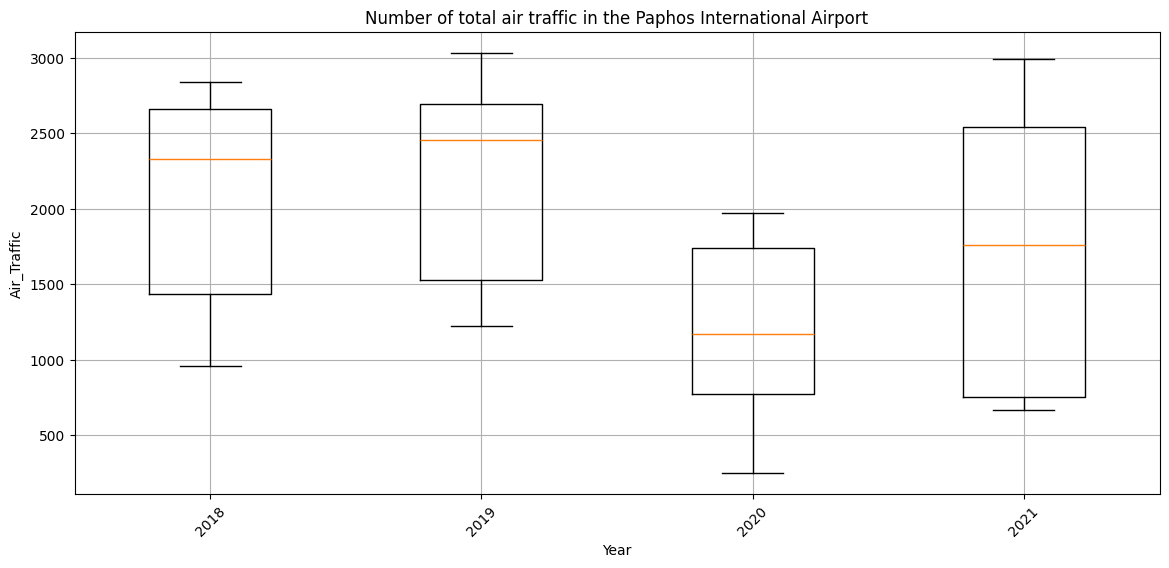

In [407]:
# Extract the year from the date column
merged_airports_TTL_traffic_df['Year'] = merged_airports_TTL_traffic_df['Date'].str.split(' ').str[1]

# Group the data by year
grouped_data = merged_airports_TTL_traffic_df.groupby('Year')['TotalSum(TTL)'].apply(list)

# Set the figure size
plt.figure(figsize=(14, 6))

# Create the box plot
plt.boxplot(grouped_data.values)

# Customize the plot
plt.title('Number of total air traffic in the Paphos International Airport')
plt.xlabel('Year')
plt.ylabel('Air_Traffic')
plt.grid(True)

# Set the x-axis labels to show only the year
plt.xticks(range(1, len(grouped_data) + 1), grouped_data.index, rotation=45)

# Show the plot
plt.show()

BAR CHART of Air traffic of different category of flights with respect to total flight count.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, 'Jan 2018'),
  Text(1, 0, 'Feb 2018'),
  Text(2, 0, 'Mar 2018'),
  Text(3, 0, 'Apr 2018'),
  Text(4, 0, 'May 2018'),
  Text(5, 0, 'Jun 2018'),
  Text(6, 0, 'Jul 2018'),
  Text(7, 0, 'Aug 2018'),
  Text(8, 0, 'Sep 2018'),
  Text(9, 0, 'Oct 2018'),
  Text(10, 0, 'Nov 2018'),
  Text(11, 0, 'Dec 2018'),
  Text(12, 0, 'Jan 2019'),
  Text(13, 0, 'Feb 2019'),
  Text(14, 0, 'Mar 2019'),
  Text(15, 0, 'Apr 2019'),
  Text(16, 0, 'May 2019'),
  Text(17, 0, 'Jun 2019'),
  Text(18, 0, 'Jul 2019'),
  Text(19, 0, 'Aug 2019'),
  Text(20, 0, 'Sep 2019'),
  Text(21, 0, 'Oct 2019'),
  Text(22, 0, 'Nov 2019'),
  Text(23, 0, 'Dec 2019'),
  Text(24, 0, 'Jan 2020'),
  Text(25, 0, 'Feb 2020'),
  Text(26, 0, 'Mar 2020'),
  

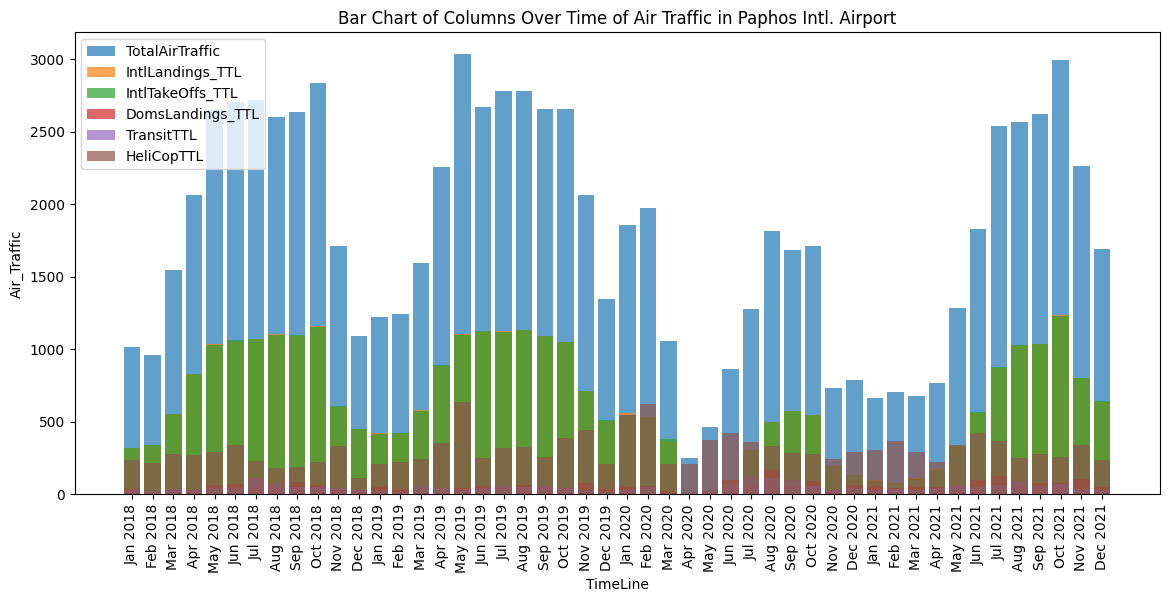

In [408]:
plt.figure(figsize=(14, 6))

# Plotting each column as a bar
plt.bar(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['TotalSum(TTL)'], label='TotalAirTraffic', alpha=0.7)
plt.bar(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['IntlLandings_TTL'], label='IntlLandings_TTL', alpha=0.7)
plt.bar(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['IntlTakeOffs_TTL'], label='IntlTakeOffs_TTL', alpha=0.7)
plt.bar(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['DomsLandings_TTL'], label='DomsLandings_TTL', alpha=0.7)
plt.bar(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['TransitTTL'], label='TransitTTL', alpha=0.7)
plt.bar(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['HeliCopTTL'], label='HeliCopTTL', alpha=0.7)

plt.title('Bar Chart of Columns Over Time of Air Traffic in Paphos Intl. Airport')
plt.xlabel('TimeLine')
plt.ylabel('Air_Traffic')
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability


LINE GRAPH of Air traffic of different category of flights with respect to total flight count.

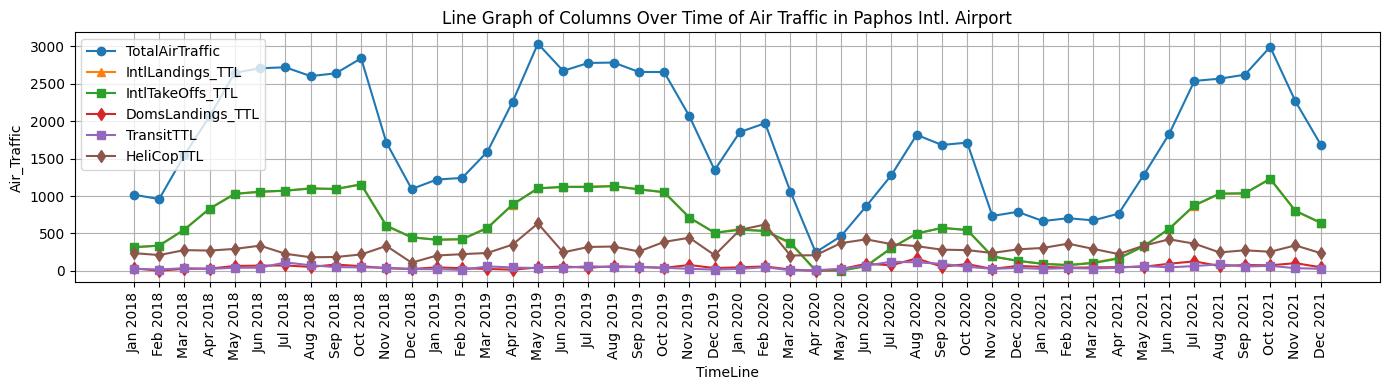

In [409]:
plt.figure(figsize=(14, 4))

plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['TotalSum(TTL)'], label='TotalAirTraffic', marker='o')
plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['IntlLandings_TTL'], label='IntlLandings_TTL', marker='^')
plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['IntlTakeOffs_TTL'], label='IntlTakeOffs_TTL', marker='s')
plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['DomsLandings_TTL'], label='DomsLandings_TTL', marker='d')
plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['TransitTTL'], label='TransitTTL', marker='s')
plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['HeliCopTTL'], label='HeliCopTTL', marker='d')

plt.title('Line Graph of Columns Over Time of Air Traffic in Paphos Intl. Airport')
plt.xlabel('TimeLine')
plt.ylabel('Air_Traffic')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

LINE GRAPH for International Flights

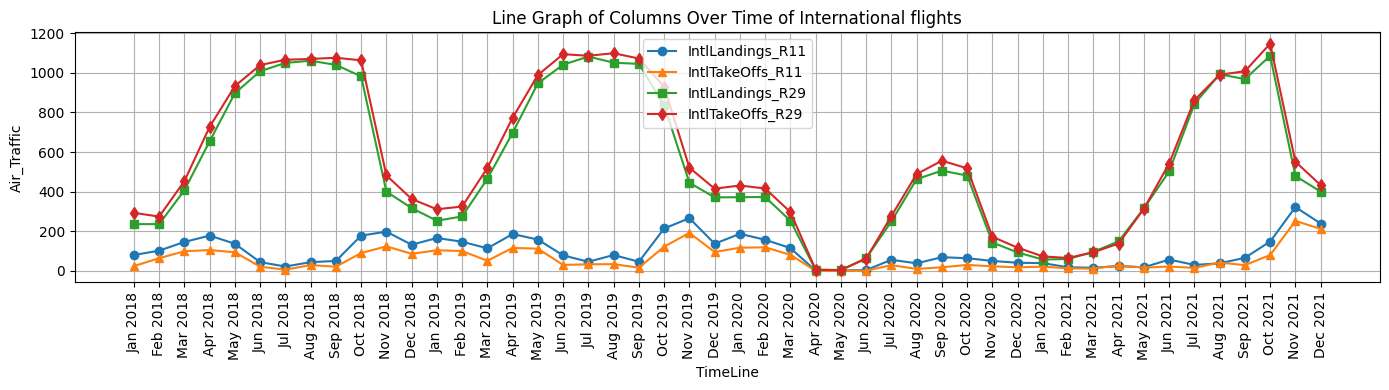

In [410]:
plt.figure(figsize=(14, 4))

plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['IntlLandings_R11'], label='IntlLandings_R11', marker='o')
plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['IntlTakeOffs_R11'], label='IntlTakeOffs_R11', marker='^')
plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['IntlLandings_R29'], label='IntlLandings_R29', marker='s')
plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['IntlTakeOffs_R29'], label='IntlTakeOffs_R29', marker='d')

plt.title('Line Graph of Columns Over Time of International flights')
plt.xlabel('TimeLine')
plt.ylabel('Air_Traffic')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

LINE GRAPH for Domestic Flights

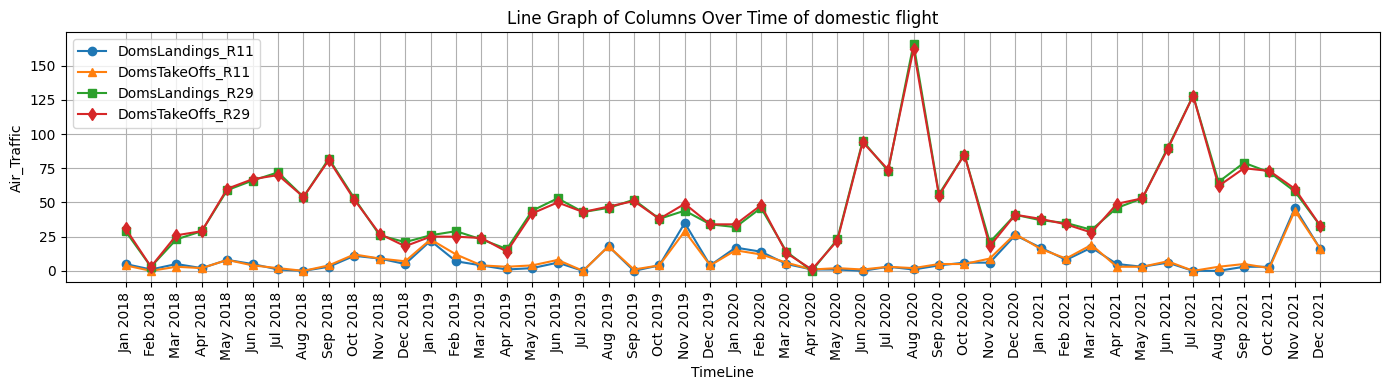

In [411]:
plt.figure(figsize=(14, 4))

plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['DomsLandings_R11'], label='DomsLandings_R11', marker='o')
plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['DomsTakeOffs_R11'], label='DomsTakeOffs_R11', marker='^')
plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['DomsLandings_R29'], label='DomsLandings_R29', marker='s')
plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['DomsTakeOffs_R29'], label='DomsTakeOffs_R29', marker='d')


plt.title('Line Graph of Columns Over Time of domestic flight')
plt.xlabel('TimeLine')
plt.ylabel('Air_Traffic')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

LINE GRAPH for Transit Flights

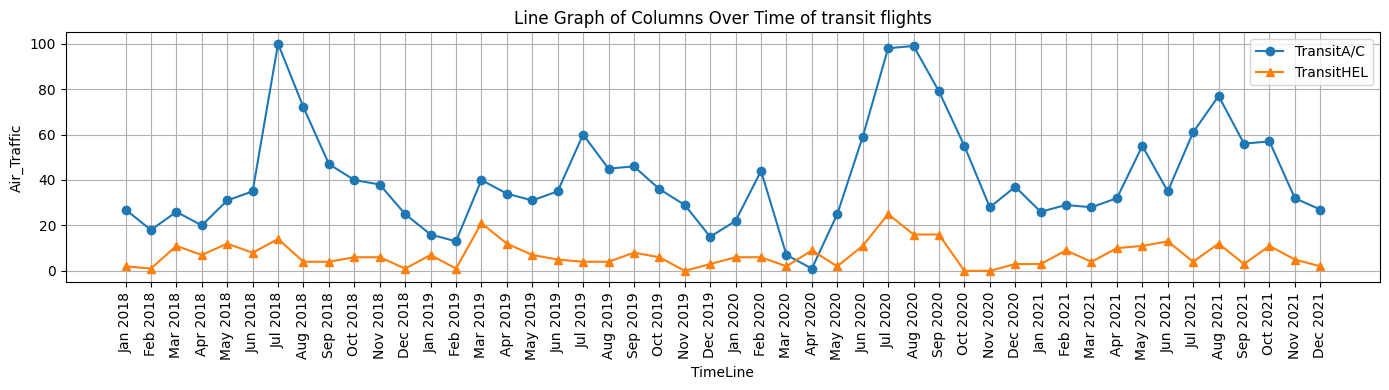

In [412]:
plt.figure(figsize=(14, 4))

plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['TransitA/C'], label='TransitA/C', marker='o')
plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['TransitHEL'], label='TransitHEL', marker='^')

plt.title('Line Graph of Columns Over Time of transit flights')
plt.xlabel('TimeLine')
plt.ylabel('Air_Traffic')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

LINE GRAPH for Helicoptors traffic

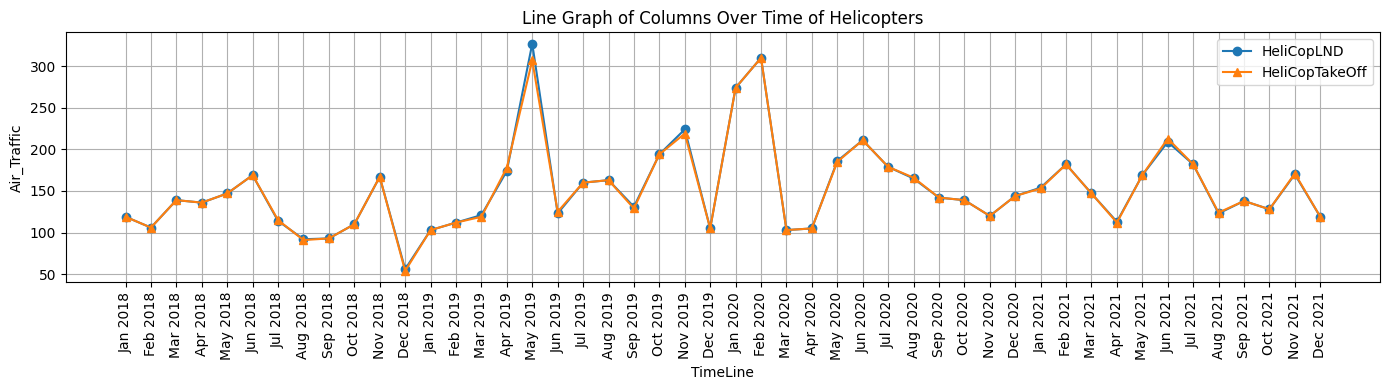

In [413]:
plt.figure(figsize=(14, 4))

plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['HeliCopLND'], label='HeliCopLND', marker='o')
plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['HeliCopT/O'], label='HeliCopTakeOff', marker='^')

plt.title('Line Graph of Columns Over Time of Helicopters')
plt.xlabel('TimeLine')
plt.ylabel('Air_Traffic')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

##### 3.2.3.WD. Weather Data
Weather Data description of Paphos International Airport

In [414]:
weather_data_df.head()

,Date,tavg,tmin,tmax,percp,snow,wdir,wspd,wpgt,pres,tsun
0,2018-01-01,14.2,8.8,18.0,None,None,345.0,16.0,NaN,1013.5,None
1,2018-01-02,15.6,11.0,18.3,None,None,NaN,11.3,NaN,1015.7,None
2,2018-01-03,17.5,15.0,19.0,None,None,NaN,11.9,NaN,1013.9,None
3,2018-01-04,14.7,11.0,17.0,None,None,NaN,14.6,NaN,1007.4,None
4,2018-01-05,13.8,10.0,19.0,None,None,10.0,16.2,NaN,1003.7,None


In [415]:
weather_data_df.shape

(1444, 11)

In [416]:
weather_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1444 non-null   object 
 1   tavg    1444 non-null   float64
 2   tmin    1444 non-null   float64
 3   tmax    1444 non-null   float64
 4   percp   0 non-null      object 
 5   snow    0 non-null      object 
 6   wdir    1355 non-null   float64
 7   wspd    1443 non-null   float64
 8   wpgt    1257 non-null   float64
 9   pres    1424 non-null   float64
 10  tsun    0 non-null      object 
dtypes: float64(7), object(4)
memory usage: 124.2+ KB


In [417]:
weather_data_df.describe()

,tavg,tmin,tmax,wdir,wspd,wpgt,pres
count,1444.000000,1444.000000,1444.000000,1355.000000,1443.000000,1257.000000,1424.000000
mean,20.287673,15.670983,24.756648,231.435424,14.056272,32.904137,1012.496489
std,5.346829,5.235135,5.356552,123.916775,4.191894,7.654212,5.494671
min,6.000000,2.000000,11.100000,0.000000,6.600000,20.400000,966.600000
25%,15.400000,11.000000,20.000000,80.500000,11.300000,27.800000,1008.400000
50%,20.500000,15.900000,25.000000,299.000000,13.100000,31.500000,1012.550000
75%,25.400000,20.025000,30.000000,320.000000,15.800000,37.000000,1016.100000
max,31.300000,26.000000,41.900000,359.000000,40.800000,68.500000,1029.800000


The describe() function was used to generate descriptive statistics for the numerical columns in the dataset, including count, mean, standard deviation, minimum, quartiles, and maximum values.

- Finding null Value in the weather dataset

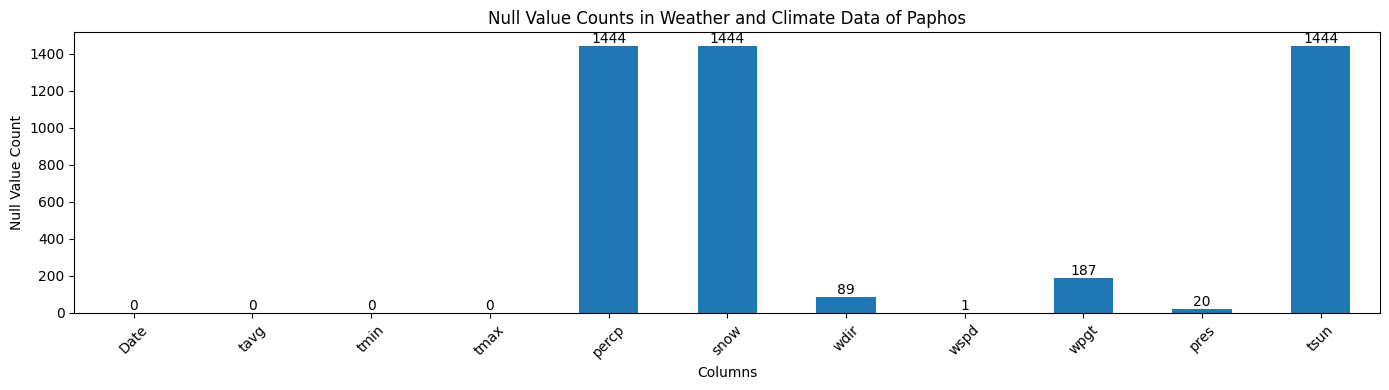

In [418]:
# Count the number of null values in each column
null_counts = weather_data_df.isnull().sum()

# Create a bar plot of null value counts
plt.figure(figsize=(14, 4))
ax = null_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.title('Null Value Counts in Weather and Climate Data of Paphos')
plt.xticks(rotation=45)

# Add text annotations for null count above each bar
for i, count in enumerate(null_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

- As Perception "percp" , "snow" and "tsun" all values zero we will drop this 3 columns

In [419]:
weather_data_df = weather_data_df.drop(columns= ["percp" , "snow", "tsun"])
weather_data_df.shape

(1444, 8)

- Fixing other null values of significant columns "wdir", "wspd", "pres" by interpolation and "wpgt" by mean value

In [420]:
weather_data_df['wdir'].interpolate(method='linear', inplace=True)
weather_data_df['wspd'].interpolate(method='linear', inplace=True)
weather_data_df['pres'].interpolate(method='linear', inplace=True)
null_counts = weather_data_df.isnull().sum()
print(null_counts)

Date      0
tavg      0
tmin      0
tmax      0
wdir      0
wspd      0
wpgt    187
pres      0
dtype: int64


In [421]:
mean_direction = weather_data_df['wpgt'].mean()
weather_data_df['wpgt'].fillna(mean_direction, inplace=True)
null_counts = weather_data_df.isnull().sum()
print(null_counts)

Date    0
tavg    0
tmin    0
tmax    0
wdir    0
wspd    0
wpgt    0
pres    0
dtype: int64


- HISTOGRAM of tempreature data of weather dataframe.

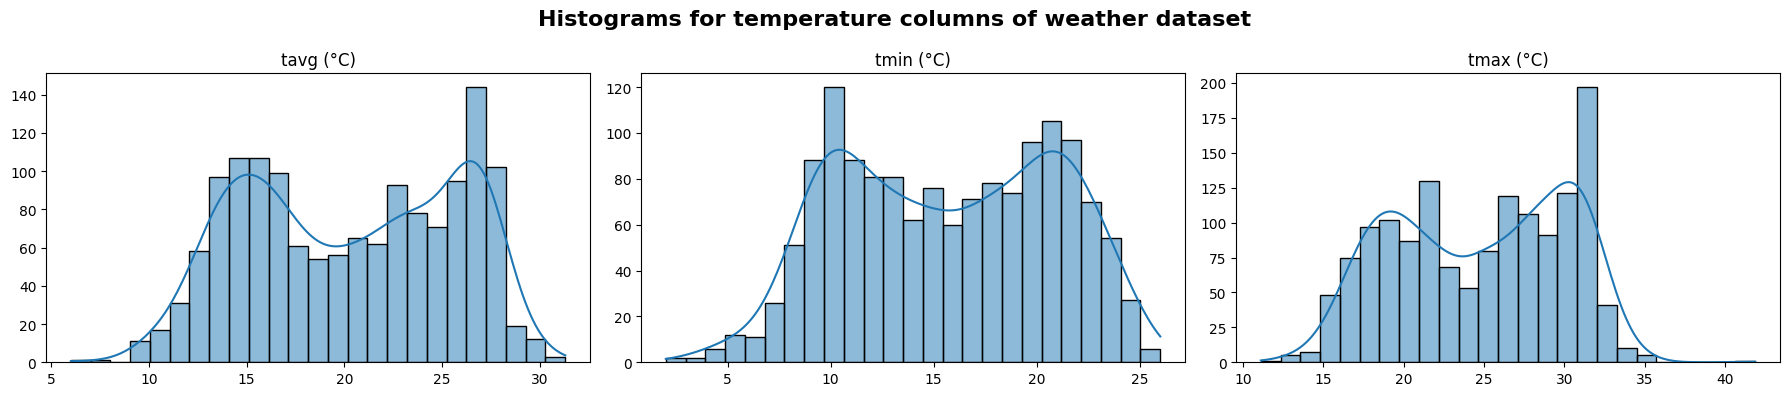

In [422]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

# Columns to visualize
cols = ['tavg', 'tmin', 'tmax']
cols_name = ['tavg (°C)', 'tmin (°C)', 'tmax (°C)']

for i, col in enumerate(cols):
    ax = axes[i]
    sns.histplot(data=weather_data_df, x=col, ax=ax, bins=25, kde=True)
    ax.set_title(cols_name[i])
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Formatting x-axis labels
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x) if x < 1000 else '{:,.0f}K'.format(x/1000)))

plt.suptitle('Histograms for temperature columns of weather dataset', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

- HISTOGRAM of wind and air pressure data of weather dataframe.

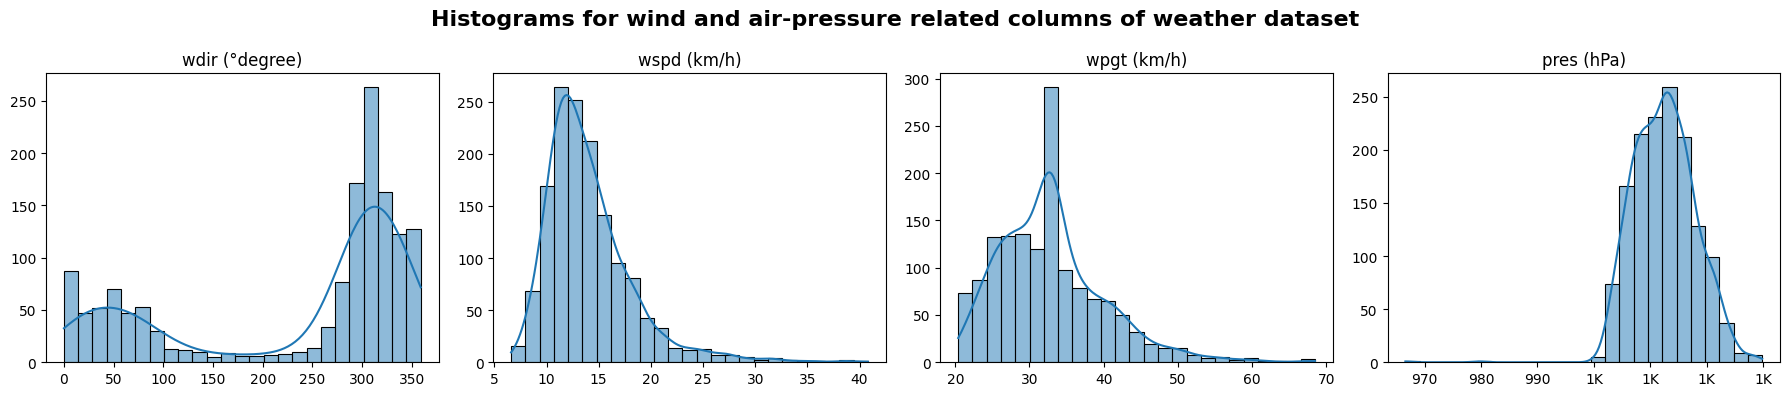

In [423]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 4))

# Columns to visualize
cols = ['wdir', 'wspd', 'wpgt', 'pres']
cols_name = ['wdir (°degree)', 'wspd (km/h)', 'wpgt (km/h)', 'pres (hPa)']

for i, col in enumerate(cols):
    ax = axes[i]
    sns.histplot(data=weather_data_df, x=col, ax=ax, bins=25, kde=True)
    ax.set_title(cols_name[i])
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Formatting x-axis labels
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x) if x < 1000 else '{:,.0f}K'.format(x/1000)))

plt.suptitle('Histograms for wind and air-pressure related columns of weather dataset', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

##### 3.2.3.CD. Combined Data

- Combining Daily Air Traffic Data and Weather Data

In [424]:
# Perform a left merge on the 'Date' column
combined_df = pd.merge(merged_airports_dailytraffic_df, weather_data_df, on='Date', how='left')

# Display the shape of the combined dataframe
print(combined_df.shape)

(1454, 29)


In [425]:
combined_df.head()

,Date,Day,IntlLandings_R11,IntlLandings_R29,IntlLandings_TTL,IntlTakeOffs_R11,IntlTakeOffs_R29,IntlTakeOffs_TTL,DomsLandings_R11,DomsLandings_R29,...,HeliCopTTL,T/G,TotalSum(TTL),tavg,tmin,tmax,wdir,wspd,wpgt,pres
0,2018-01-01,1,1.0,7.0,8.0,0.0,8.0,8,0.0,0.0,...,0.0,0.0,16.0,14.2,8.8,18.0,345.00,16.0,32.904137,1013.5
1,2018-01-02,2,1.0,10.0,11.0,0.0,10.0,10,0.0,2.0,...,0.0,0.0,25.0,15.6,11.0,18.3,261.25,11.3,32.904137,1015.7
2,2018-01-03,3,11.0,9.0,20.0,6.0,15.0,21,1.0,0.0,...,10.0,0.0,53.0,17.5,15.0,19.0,177.50,11.9,32.904137,1013.9
3,2018-01-04,4,1.0,11.0,12.0,0.0,11.0,11,0.0,0.0,...,4.0,0.0,27.0,14.7,11.0,17.0,93.75,14.6,32.904137,1007.4
4,2018-01-05,5,1.0,7.0,8.0,0.0,10.0,10,0.0,1.0,...,0.0,0.0,20.0,13.8,10.0,19.0,10.00,16.2,32.904137,1003.7


In [426]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1453
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1454 non-null   object 
 1   Day               1454 non-null   object 
 2   IntlLandings_R11  1454 non-null   float64
 3   IntlLandings_R29  1454 non-null   float64
 4   IntlLandings_TTL  1454 non-null   float64
 5   IntlTakeOffs_R11  1454 non-null   float64
 6   IntlTakeOffs_R29  1454 non-null   float64
 7   IntlTakeOffs_TTL  1454 non-null   int64  
 8   DomsLandings_R11  1454 non-null   float64
 9   DomsLandings_R29  1454 non-null   float64
 10  DomsLandings_TTL  1454 non-null   float64
 11  DomsTakeOffs_R11  1454 non-null   float64
 12  DomsTakeOffs_R29  1454 non-null   float64
 13  DomsTakeOffs_TTL  1454 non-null   int64  
 14  TransitA/C        1454 non-null   float64
 15  TransitHEL        1454 non-null   float64
 16  TransitTTL        1454 non-null   float64


- handling null values in the combined dataset

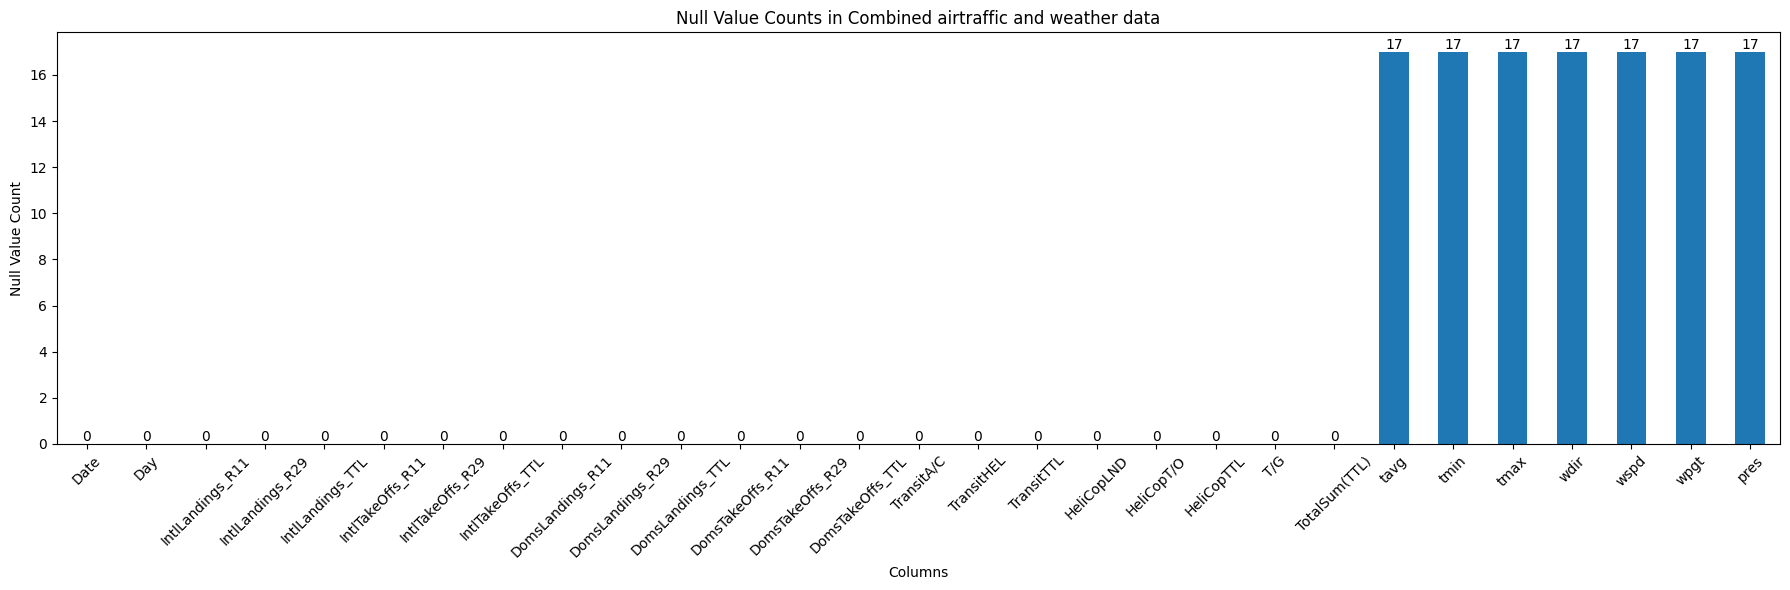

In [427]:
# Count the number of null values in each column
null_counts = combined_df.isnull().sum()

# Create a bar plot of null value counts
plt.figure(figsize=(18, 6))
ax = null_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.title('Null Value Counts in Combined airtraffic and weather data')
plt.xticks(rotation=45)

# Add text annotations for null count above each bar
for i, count in enumerate(null_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [428]:
# Doing linear interpolation for all the null values of weather data
combined_df['tavg'].interpolate(method='linear', inplace=True)
combined_df['tmin'].interpolate(method='linear', inplace=True)
combined_df['tmax'].interpolate(method='linear', inplace=True)

combined_df['wdir'].interpolate(method='linear', inplace=True)
combined_df['wspd'].interpolate(method='linear', inplace=True)
combined_df['wpgt'].interpolate(method='linear', inplace=True)
combined_df['pres'].interpolate(method='linear', inplace=True)


In [429]:
null_counts = combined_df.isnull().sum()
print(null_counts)

Date                0
Day                 0
IntlLandings_R11    0
IntlLandings_R29    0
IntlLandings_TTL    0
IntlTakeOffs_R11    0
IntlTakeOffs_R29    0
IntlTakeOffs_TTL    0
DomsLandings_R11    0
DomsLandings_R29    0
DomsLandings_TTL    0
DomsTakeOffs_R11    0
DomsTakeOffs_R29    0
DomsTakeOffs_TTL    0
TransitA/C          0
TransitHEL          0
TransitTTL          0
HeliCopLND          0
HeliCopT/O          0
HeliCopTTL          0
T/G                 0
TotalSum(TTL)       0
tavg                0
tmin                0
tmax                0
wdir                0
wspd                0
wpgt                0
pres                0
dtype: int64


- HISTOGRAM of weather data along with total traffic of combined dataframe.

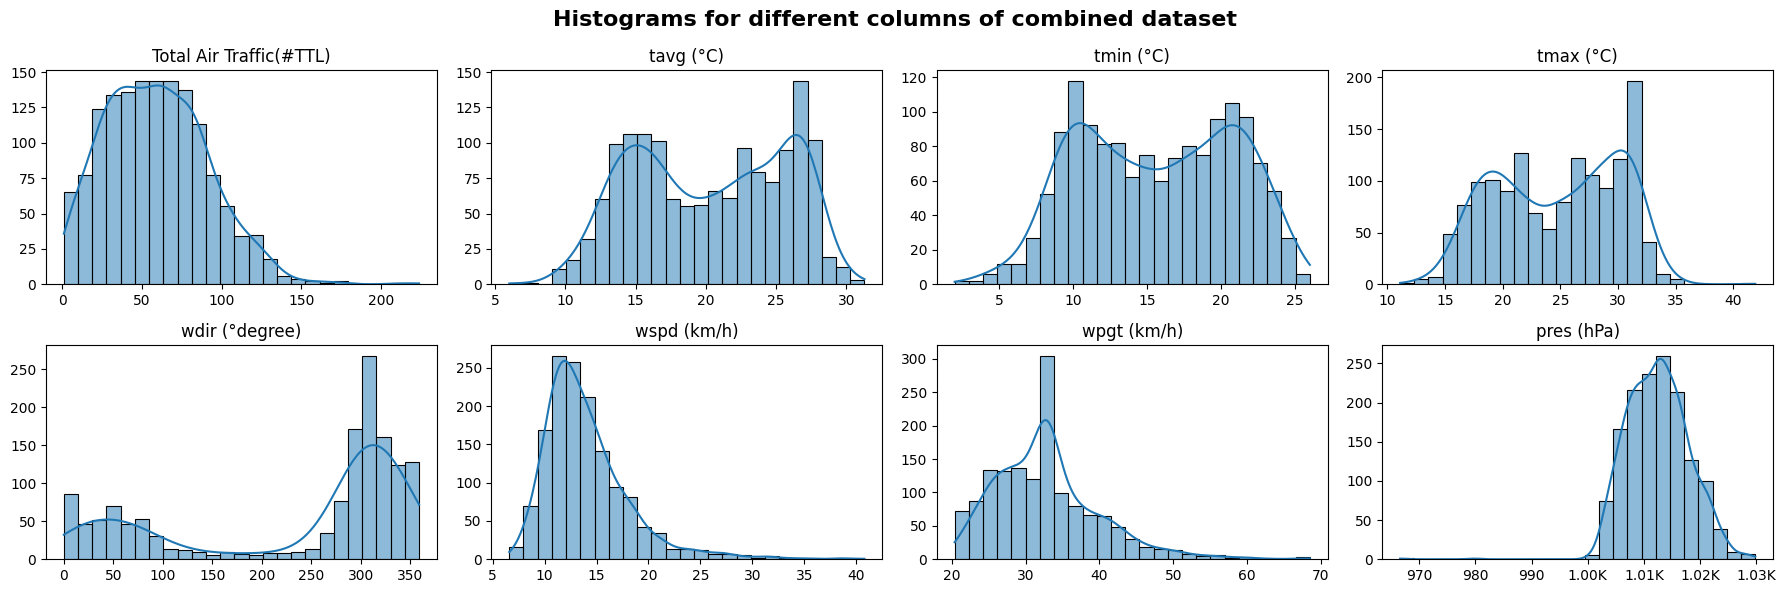

In [430]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 6))

# Columns and their corresponding names
cols = ['TotalSum(TTL)', 'tavg', 'tmin', 'tmax', 'wdir', 'wspd', 'wpgt', 'pres']
cols_name = ['Total Air Traffic(#TTL)', 'tavg (°C)', 'tmin (°C)', 'tmax (°C)', 'wdir (°degree)', 'wspd (km/h)', 'wpgt (km/h)', 'pres (hPa)']

for i, col in enumerate(cols):
    ax = axes[i//4, i%4]  # Adjust the row and column indexing for the subplot
    sns.histplot(data=combined_df, x=col, ax=ax, bins=25, kde=True)
    ax.set_title(cols_name[i])
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # Formatting x-axis labels
    if col == 'pres':
        ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000) + 'K' if x >= 1000 else '{:g}'.format(x)))
    else:
        ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K' if x >= 1000 else '{:g}'.format(x)))

# Remove any empty subplots
for j in range(len(cols), 8):
    fig.delaxes(axes.flatten()[j])

plt.suptitle('Histograms for different columns of combined dataset', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Histograms were created for each of the columns and it shows the distribution of values for columns such as Total Air Traffic (TotalSum(TTL)),tavg, tmin, tmax, wdir, wspd, wpgt, and pres .
The number of bins was set to 25, and kernel density estimation (KDE) was enabled to visualize the underlying distribution.

- BOX PLOT of total air traffic and weather data columns from combined dataset. 

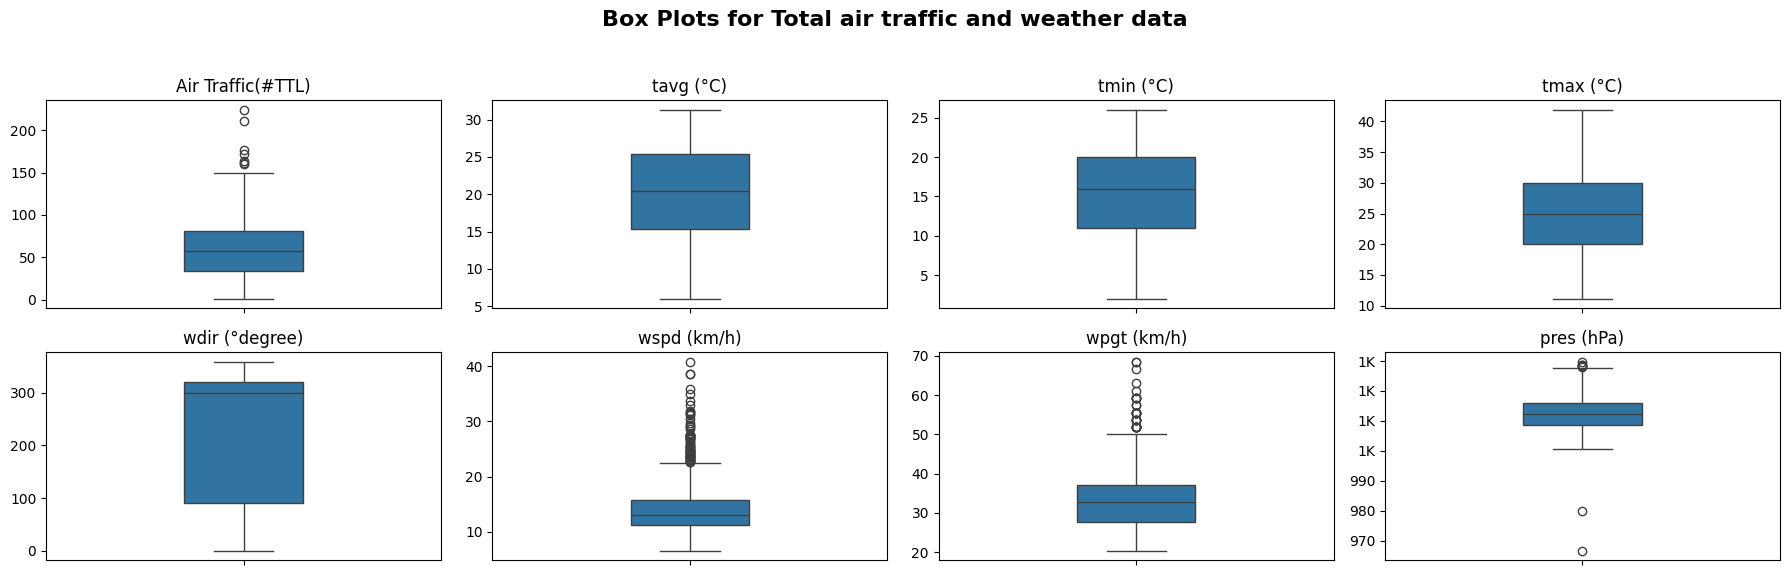

In [431]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 6))

# Columns and their corresponding names
cols = ['TotalSum(TTL)', 'tavg', 'tmin', 'tmax', 'wdir', 'wspd', 'wpgt', 'pres']
cols_name = ['Air Traffic(#TTL)', 'tavg (°C)', 'tmin (°C)', 'tmax (°C)', 'wdir (°degree)', 'wspd (km/h)', 'wpgt (km/h)', 'pres (hPa)']

for i, col in enumerate(cols):
    ax = axes[i//4, i%4]
    sns.boxplot(data=combined_df, y=col, ax=ax, width=0.3)
    ax.set_title(cols_name[i])
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # Formatting y-axis labels
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K' if y >= 1000 else '{:g}'.format(y)))

# Remove any empty subplots
for j in range(len(cols), 8):
    fig.delaxes(axes.flatten()[j])

plt.suptitle('Box Plots for Total air traffic and weather data', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for the title
plt.show()


- Correlation Matrix of weather data columns with respect to Total Air Traffic column from combined dataframe.

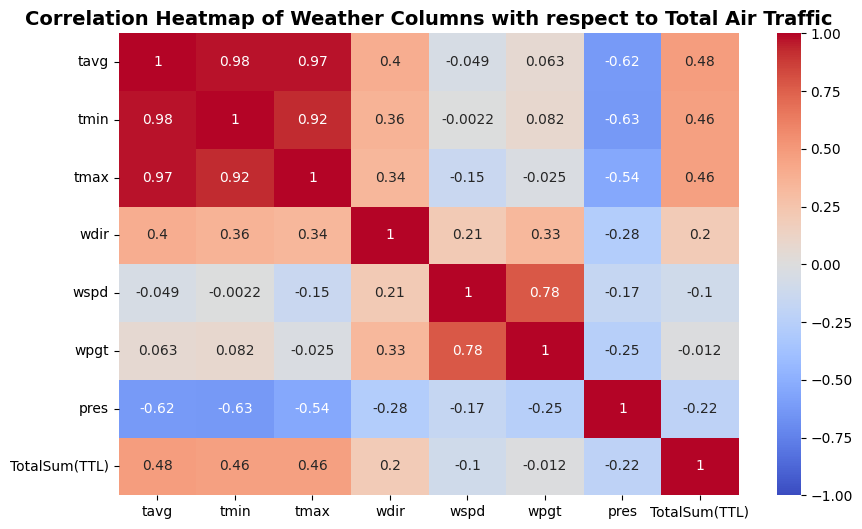

Correlations with respect to Total Air Traffic 'TotalSum(TTL)':
tavg    0.478371
tmax    0.463927
tmin    0.461722
wdir    0.201577
wpgt   -0.012042
wspd   -0.100340
pres   -0.215368
Name: TotalSum(TTL), dtype: float64


In [432]:
# Filter the columns you're interested in
selected_columns = ['tavg', 'tmin', 'tmax', 'wdir', 'wspd', 'wpgt', 'pres']

# Compute the correlation matrix for the selected columns
corr_matrix_selected = combined_df[selected_columns + ['TotalSum(TTL)']].corr()

# Extract correlations with respect to 'TotalSum(TTL)'
corr_with_airtraffic_selected = corr_matrix_selected['TotalSum(TTL)'].drop('TotalSum(TTL)').sort_values(ascending=False)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_selected, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Weather Columns with respect to Total Air Traffic', fontsize=14, fontweight='bold')
plt.show()

# Display correlations with respect to 'TotalSum(TTL)'
print("Correlations with respect to Total Air Traffic 'TotalSum(TTL)':")
print(corr_with_airtraffic_selected)

tavg, tmin , tmax means tempreature data and wdir means wind direction data shows moderate positive correlation and wind speed(wspd) and air pressure shows moderate negative correlation. Wind Peak Guest (wpgt) shows minimal to almost zero correlation. 

# 4. Discussion and Conclusion:

## 4.1 Discussion - Q&A:
#### Q1: How does the air traffic volume at Paphos International Airport vary throughout the years?

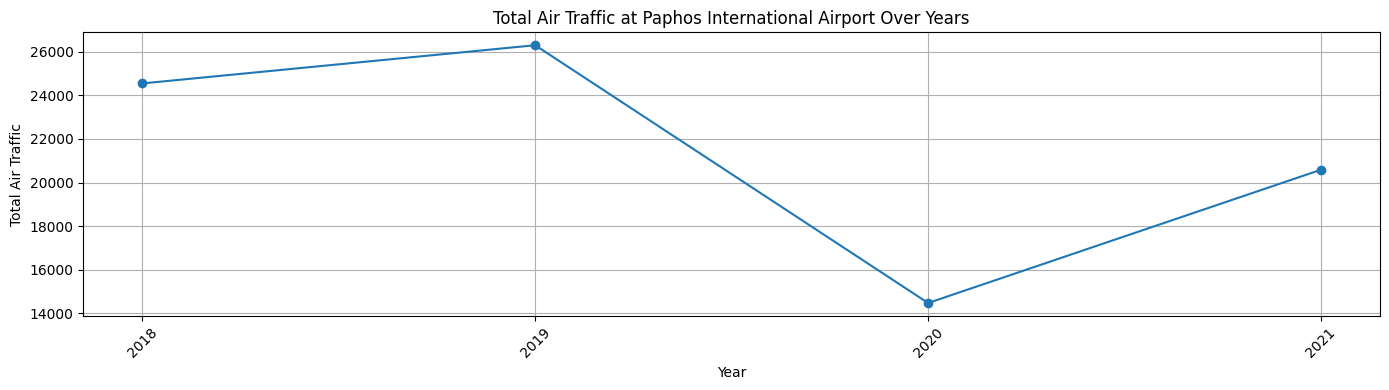

In [433]:
# Extract the year from the date column
merged_airports_TTL_traffic_df['Year'] = merged_airports_TTL_traffic_df['Date'].str.split(' ').str[1]

# Group the data by year and calculate the sum of air traffic
grouped_data = merged_airports_TTL_traffic_df.groupby('Year')['TotalSum(TTL)'].sum()

# Set the figure size
plt.figure(figsize=(14, 4))

# Create the line graph
plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-')

# Customize the plot
plt.title('Total Air Traffic at Paphos International Airport Over Years')
plt.xlabel('Year')
plt.ylabel('Total Air Traffic')
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

As Paphos International Airport is one of the busiest and second largest airport of Cyprus, is commonly used by tourists on vacation in western Cyprus, providing access to popular resorts of the amazing city of Paphos on the Mediterranean island of Cyprus. From the dataset values we can see there was more than 24000 flights operated in total in year 2018, which increased to more than 26000 in the following year 2019. But from the data we can see a clear drop in the total air-traffic due to COVID. As covid hits all the over the world. Due to travel restrictions, lockdowns, and reduced passenger confidence, there likely was a sharp decline in the number of passengers passing through the airport. Thus, many airlines reduced or suspended their flights, leading to fewer arrivals and departure. Which can be seen by the [impact of covid in passenger airline industry](https://www.mckinsey.com/industries/travel-logistics-and-infrastructure/our-insights/taking-stock-of-the-pandemics-impact-on-global-aviation) in global economy report. In 2021, with less restriction as aviation & tourism industry started regaining its position Paphos International Airport also shows an upward trend of more than 20000 air-traffic in the year. 

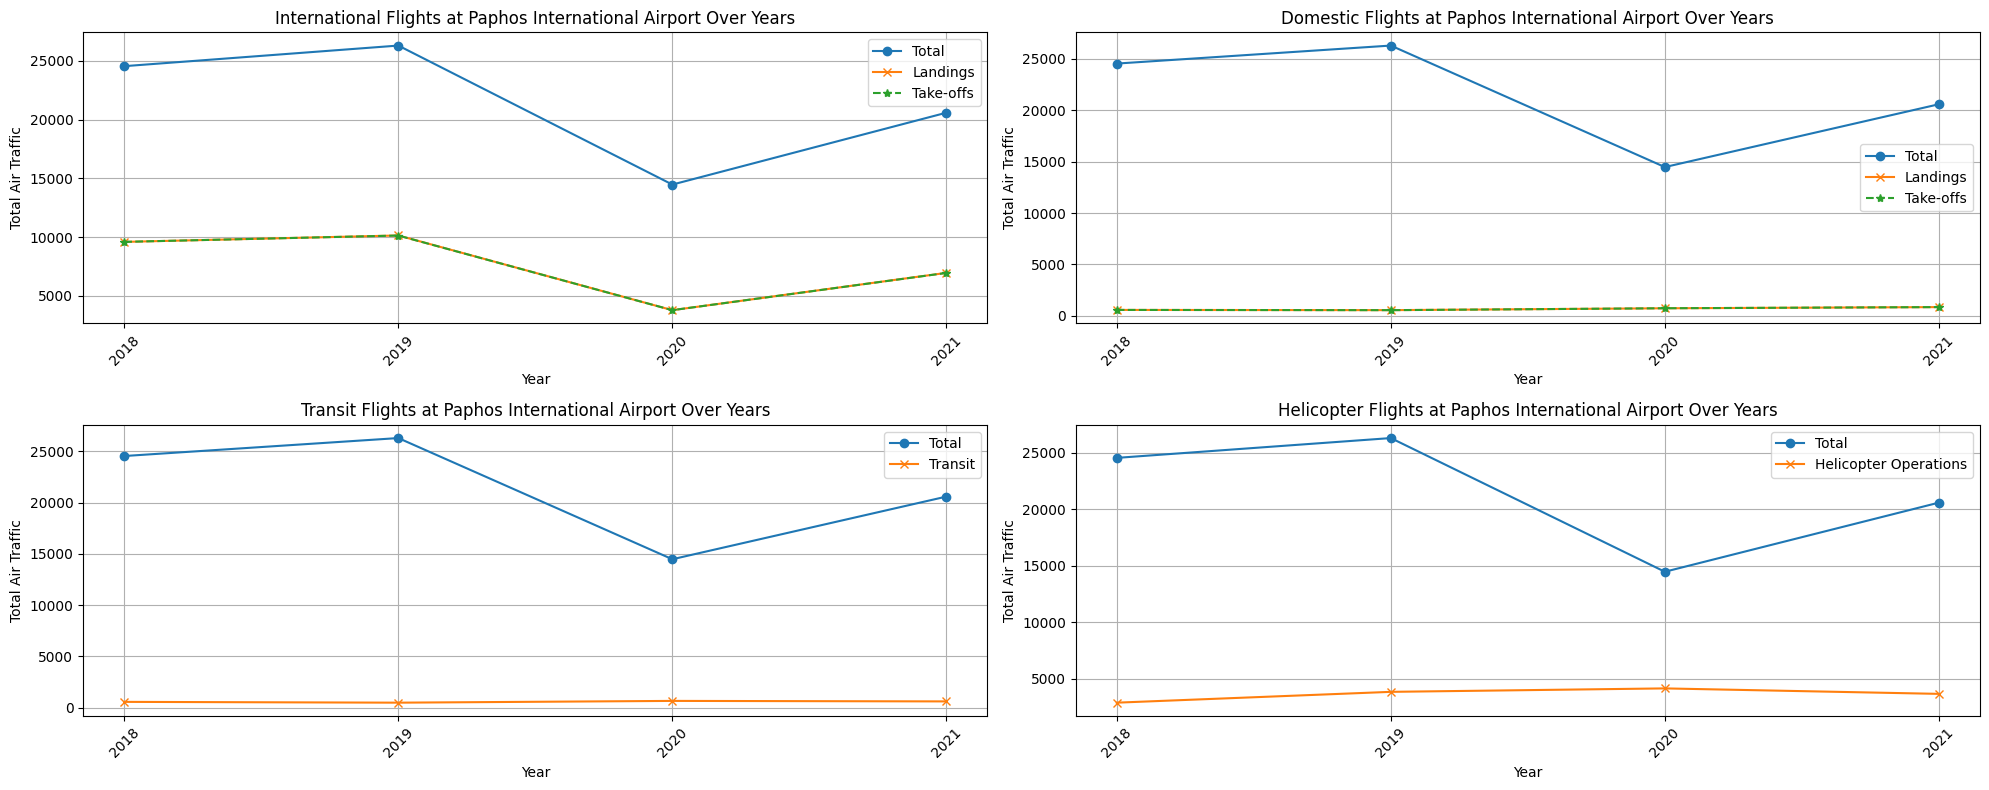

In [434]:
# Extract the year from the date column
merged_airports_TTL_traffic_df['Year'] = merged_airports_TTL_traffic_df['Date'].str.split(' ').str[1]

# Set the figure size
plt.figure(figsize=(20, 8))

# Group the data by year and calculate the sum of air traffic
grouped_data_TTL = merged_airports_TTL_traffic_df.groupby('Year')['TotalSum(TTL)'].sum()

grouped_data_IntlLandTTL = merged_airports_TTL_traffic_df.groupby('Year')['IntlLandings_TTL'].sum()
grouped_data_IntTakeOffTTL= merged_airports_TTL_traffic_df.groupby('Year')['IntlTakeOffs_TTL'].sum()


grouped_data_DomsLandTTL = merged_airports_TTL_traffic_df.groupby('Year')['DomsLandings_TTL'].sum()
grouped_data_DomsTakeOffTTL= merged_airports_TTL_traffic_df.groupby('Year')['DomsTakeOffs_TTL'].sum()


grouped_data_TransitTTL = merged_airports_TTL_traffic_df.groupby('Year')['TransitTTL'].sum()

grouped_data_HeliCopTTL = merged_airports_TTL_traffic_df.groupby('Year')['HeliCopTTL'].sum()

# First subplot for International Flights
plt.subplot(2, 2, 1) 
plt.plot(grouped_data_TTL.index, grouped_data_TTL.values, marker='o', linestyle='-', label='Total')
plt.plot(grouped_data_IntlLandTTL.index, grouped_data_IntlLandTTL.values, marker='x', linestyle='-', label='Landings')
plt.plot(grouped_data_IntTakeOffTTL.index, grouped_data_IntTakeOffTTL.values, marker='*', linestyle='--', label='Take-offs')
plt.title('International Flights at Paphos International Airport Over Years')
plt.xlabel('Year')
plt.ylabel('Total Air Traffic')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

# Second subplot for Domestic Flights
plt.subplot(2, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(grouped_data_TTL.index, grouped_data_TTL.values, marker='o', linestyle='-', label='Total')
plt.plot(grouped_data_DomsLandTTL.index, grouped_data_DomsLandTTL.values, marker='x', linestyle='-', label='Landings')
plt.plot(grouped_data_DomsTakeOffTTL.index, grouped_data_DomsTakeOffTTL.values, marker='*', linestyle='--', label='Take-offs')
plt.title('Domestic Flights at Paphos International Airport Over Years')
plt.xlabel('Year')
plt.ylabel('Total Air Traffic')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

# Third subplot for Domestic Flights
plt.subplot(2, 2, 3)
plt.plot(grouped_data_TTL.index, grouped_data_TTL.values, marker='o', linestyle='-', label='Total')
plt.plot(grouped_data_TransitTTL.index, grouped_data_TransitTTL.values, marker='x', linestyle='-', label='Transit')
plt.title('Transit Flights at Paphos International Airport Over Years')
plt.xlabel('Year')
plt.ylabel('Total Air Traffic')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

# Fourth subplot for Domestic Flights
plt.subplot(2, 2, 4)
plt.plot(grouped_data_TTL.index, grouped_data_TTL.values, marker='o', linestyle='-', label='Total')
plt.plot(grouped_data_HeliCopTTL.index, grouped_data_HeliCopTTL.values, marker='x', linestyle='-', label='Helicopter Operations')
plt.title('Helicopter Flights at Paphos International Airport Over Years')
plt.xlabel('Year')
plt.ylabel('Total Air Traffic')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

From the above graphs as we can see there is a downfall in Internationa flights due to COVID restrictions in year 2020, but but the amount of domestic flight and transit flight remains almost same as International border was restiricted and closed through out the year. On the other hand, we can see slightly higher Helicopter Traffic in 2020 comparing to previous years as well as 2021. 

#### Q2: How does the wind speed at Paphos International Airport vary throughout the year?

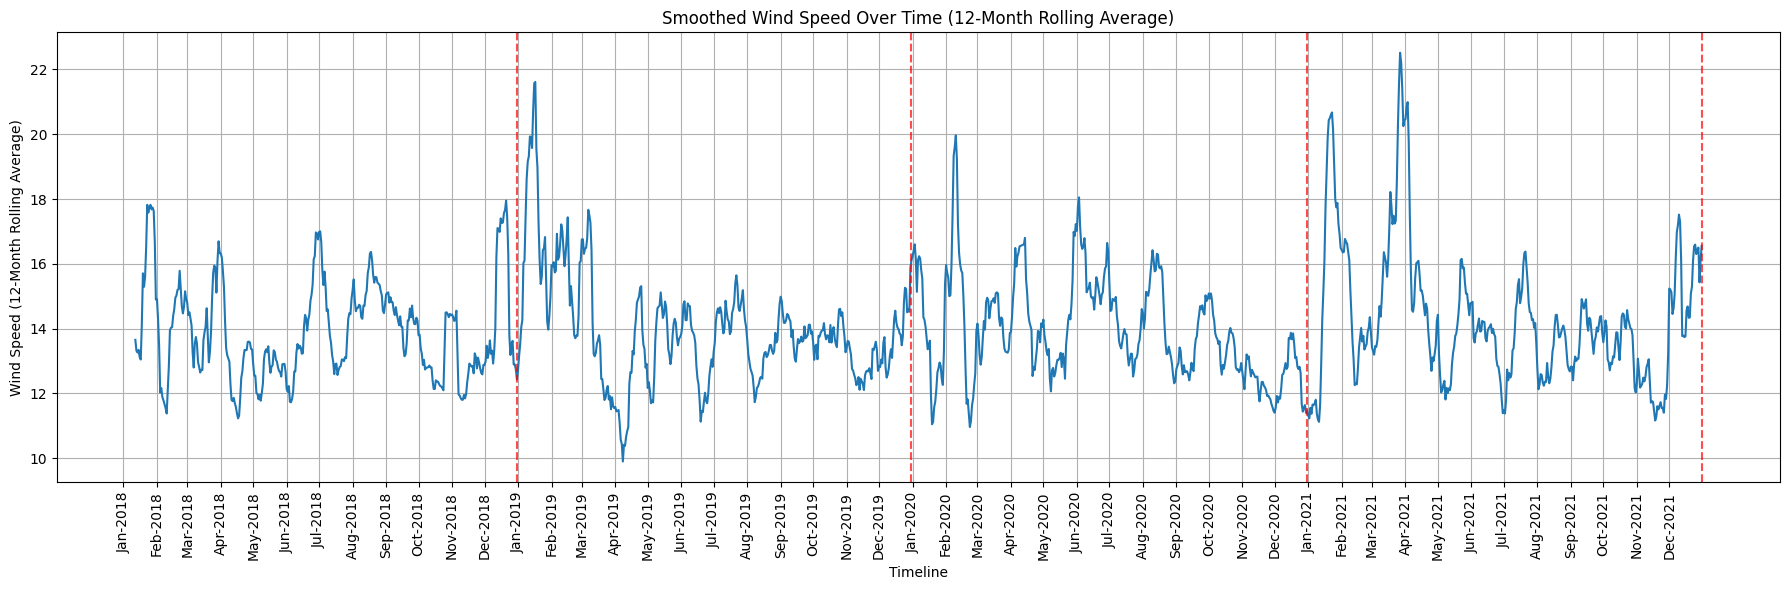

In [435]:
# Convert the 'Date' column to datetime type
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Extract the month and year from the 'Date' column
combined_df['Month'] = combined_df['Date'].dt.month
combined_df['Year'] = combined_df['Date'].dt.year

# Calculate the rolling average with a window size of 12 (for monthly data)
combined_df['wspd_smoothed'] = combined_df['wspd'].rolling(window=12).mean()

# Set the figure size
plt.figure(figsize=(18, 6))  # Adjusted figure size for better readability

# Create the line plot with smoothed data
sns.lineplot(data=combined_df, x='Date', y='wspd_smoothed')

# Customize the plot
plt.title('Smoothed Wind Speed Over Time (12-Month Rolling Average)')
plt.xlabel('Timeline')
plt.ylabel('Wind Speed (12-Month Rolling Average)')
plt.grid(True)

# Format the x-axis ticks to show months with yearly tick marks
monthly_ticks = pd.date_range(start=combined_df['Date'].min(), end=combined_df['Date'].max(), freq='MS')
yearly_ticks = pd.date_range(start=combined_df['Date'].min(), end=combined_df['Date'].max(), freq='Y')

plt.xticks(monthly_ticks, 
           [pd.Timestamp(i).strftime('%b-%Y') for i in monthly_ticks], 
           rotation=90)  # Rotates the x-axis labels for better readability

# Add yearly tick marks
for tick in yearly_ticks:
    plt.axvline(tick, color='red', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

From this graph we can interpret that there is significant changes in wind speed over one particular year cycle. But not much significant changes in the wind pattern at Paphos International Airport over the years. Usually It's little more windy than average in the month of December- February. But in between year 2020-21, the window shifted to January - April with a higher wind speed average. 

#### Q3. Does wind speed effect air traffic volume at Paphos International Airport?

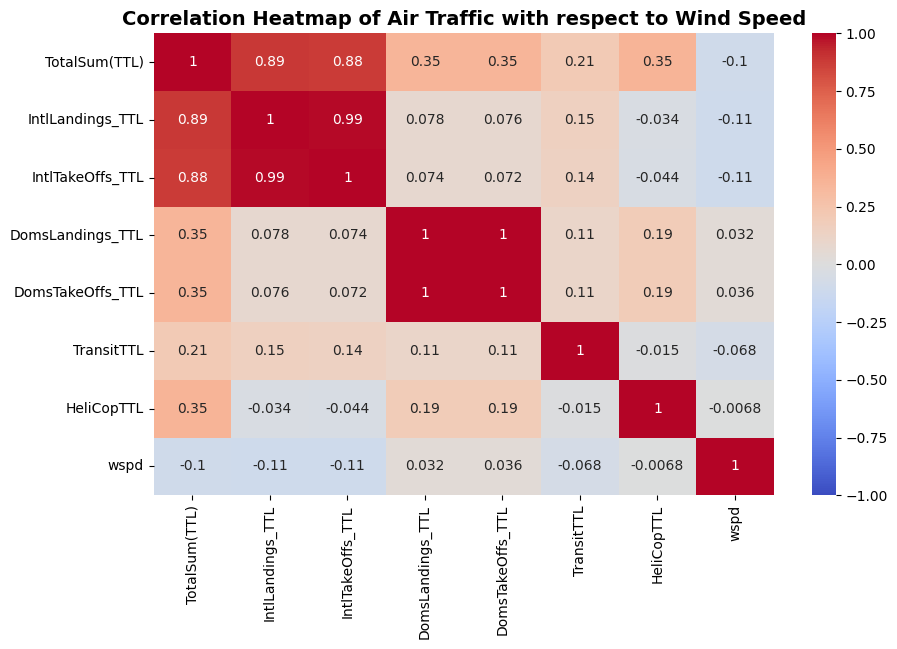

Correlations with respect to Windspeed 'wspd':
DomsTakeOffs_TTL    0.036214
DomsLandings_TTL    0.032121
HeliCopTTL         -0.006791
TransitTTL         -0.068428
TotalSum(TTL)      -0.100340
IntlLandings_TTL   -0.107554
IntlTakeOffs_TTL   -0.108149
Name: wspd, dtype: float64


In [436]:
# Filter the columns you're interested in
selected_columns = ['TotalSum(TTL)', 'IntlLandings_TTL', 'IntlTakeOffs_TTL', 'DomsLandings_TTL', 'DomsTakeOffs_TTL', 'TransitTTL', 'HeliCopTTL']

# Compute the correlation matrix for the selected columns
corr_matrix_selected = combined_df[selected_columns + ['wspd']].corr()

# Extract correlations with respect to 'wspd'
corr_with_airtraffic_selected = corr_matrix_selected['wspd'].drop('wspd').sort_values(ascending=False)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_selected, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Air Traffic with respect to Wind Speed', fontsize=14, fontweight='bold')
plt.show()

# Display correlations with respect to 'TotalSum(TTL)'
print("Correlations with respect to Windspeed 'wspd':")
print(corr_with_airtraffic_selected)

From the correlation matrix we can observe that Overall wind has very less impact on air traffic.

A weak negative (-0.100340) correlation between wind speed and total air traffic "TotalSum(TTL)"  indicates as wind speed increases, there's a slight tendency for total air traffic to decrease, and vice versa. But, this does not have any solid impact on total air traffic at Paphos International AIrport.

Both international landings and takeoffs show a weak negative correlation, suggesting a potential but not strong relationship with increasing wind speed.
Domestic takeoffs and landings have very weak positive correlations with wind speed.

The transit total "TransitTTL" also has a moderate negative (-0.068428) correlation with wind speed. This indicates that higher wind speeds might be associated with a decrease in transit operations.

The correlation between helicopter operations "HeliCopTTL" and wind speed is very close to zero (-0.006791), indicating almost no linear relationship between them.

Thus, Wind speed does not have any strong impact on air traffic at Paphos International Airport.

#### Q4: How does the wind direction at Paphos International Airport vary throughout the year?

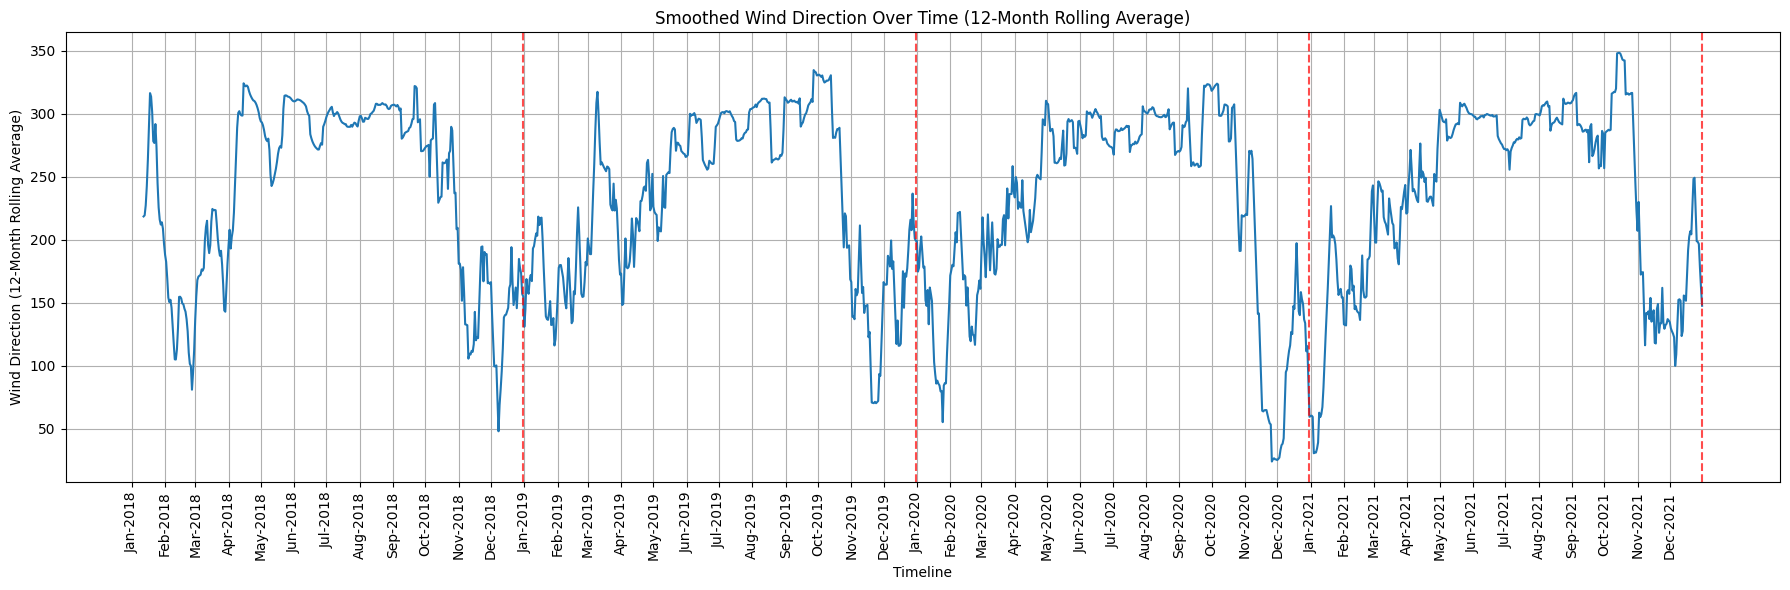

In [437]:
# Convert the 'Date' column to datetime type
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Extract the month and year from the 'Date' column
combined_df['Month'] = combined_df['Date'].dt.month
combined_df['Year'] = combined_df['Date'].dt.year

# Calculate the rolling average with a window size of 12 (for monthly data)
combined_df['wdir_smoothed'] = combined_df['wdir'].rolling(window=12).mean()

# Set the figure size
plt.figure(figsize=(18, 6))  # Adjusted figure size for better readability

# Create the line plot with smoothed data
sns.lineplot(data=combined_df, x='Date', y='wdir_smoothed')

# Customize the plot
plt.title('Smoothed Wind Direction Over Time (12-Month Rolling Average)')
plt.xlabel('Timeline')
plt.ylabel('Wind Direction (12-Month Rolling Average)')
plt.grid(True)

# Format the x-axis ticks to show months with yearly tick marks
monthly_ticks = pd.date_range(start=combined_df['Date'].min(), end=combined_df['Date'].max(), freq='MS')
yearly_ticks = pd.date_range(start=combined_df['Date'].min(), end=combined_df['Date'].max(), freq='Y')

plt.xticks(monthly_ticks, 
           [pd.Timestamp(i).strftime('%b-%Y') for i in monthly_ticks], 
           rotation=90)  # Rotates the x-axis labels for better readability

# Add yearly tick marks
for tick in yearly_ticks:
    plt.axvline(tick, color='red', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

From the above graph wind direction data of Paphos International airport exhibits significant variation throughout the years, following seasonal patterns. But we don not ovserve any significant changes over the 12 months of different years. The wind direction remains the same for each of the years data we have. 

####  Q5. Does wind direction effect air traffic volume at Paphos International Airport?


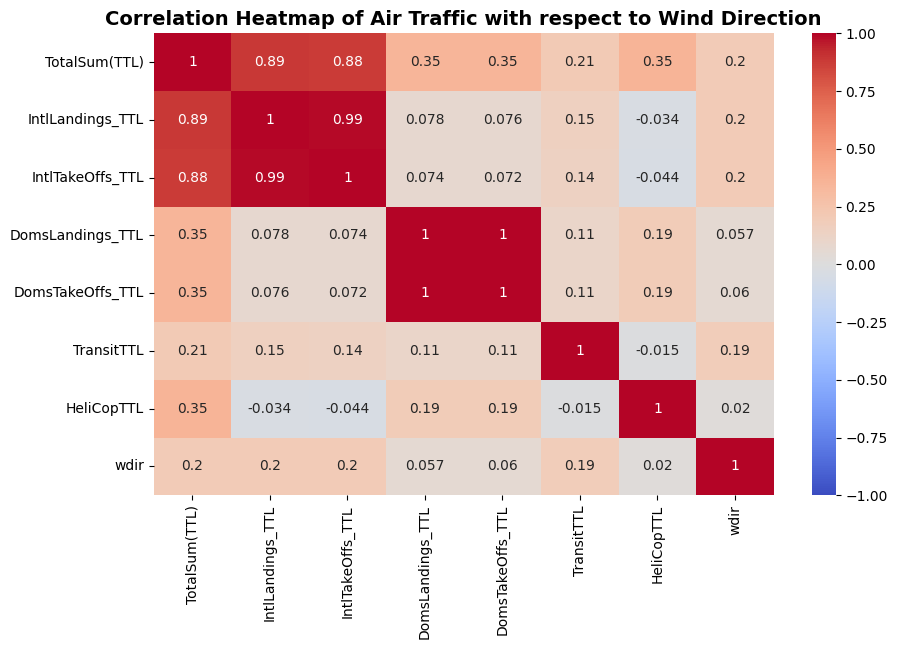

Correlations with respect to Wind Direction 'wdir':
TotalSum(TTL)       0.201577
IntlTakeOffs_TTL    0.198894
IntlLandings_TTL    0.198696
TransitTTL          0.186562
DomsTakeOffs_TTL    0.059958
DomsLandings_TTL    0.056618
HeliCopTTL          0.019706
Name: wdir, dtype: float64


In [438]:
# Filter the columns you're interested in
selected_columns = ['TotalSum(TTL)', 'IntlLandings_TTL', 'IntlTakeOffs_TTL', 'DomsLandings_TTL', 'DomsTakeOffs_TTL', 'TransitTTL', 'HeliCopTTL']

# Compute the correlation matrix for the selected columns
corr_matrix_selected = combined_df[selected_columns + ['wdir']].corr()

# Extract correlations with respect to 'wspd'
corr_with_airtraffic_selected = corr_matrix_selected['wdir'].drop('wdir').sort_values(ascending=False)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_selected, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Air Traffic with respect to Wind Direction', fontsize=14, fontweight='bold')
plt.show()

# Display correlations with respect to 'TotalSum(TTL)'
print("Correlations with respect to Wind Direction 'wdir':")
print(corr_with_airtraffic_selected)

From the above correaltion matrix of air traffic and wind direction of Paphos International Airport we can identify some small positive correlation with air traffic data.

There is a moderate positive (0.201577) correlation between wind direction and total air traffic "TotalSum(TTL)". This suggests that as wind direction changes, there is a tendency for total air traffic to change in a certain direction as well. However, the magnitude of 0.201577 indicates that the relationship is not extremely strong.

Similar to the total air traffic, there is a moderate positive (0.198894) correlation between wind direction and international take offs "IntlTakeOffs_TTL". This implies that as wind direction changes, the number of international takeoffs may also change correspondingly.The correlation (0.198696) between wind direction is also moderately positive for international landings "IntlLandings_TTL", suggesting a similar relationship as observed with international takeoffs.

For domestic air traffic the correlation is a weak positive correlation. The strength of the relationship between wind direction and domestic takeoffs "DomsTakeOffs_TTL" is notably weaker (0.059958) compared to international metrics. Similarly, there's a weak positive correlation (0.056618) for domestic landings "DomsLandings_TTL", indicating a less pronounced relationship with wind direction compared to international metrics.

For a transit flight traffic "TransitTTL" moderate positive (0.186562) correlation again, indicating that transit operations might be influenced by changes in wind direction, although the relationship is not extremely strong.

For the total helicopter traffic "HeliCopTTL" the correlation is very weak (0.019706) and almost negligible. It suggests that there is almost no linear relationship between wind direction and helicopter operations.

Thus, wind direction seems to have a moderate positive correlation with various air traffic metrics, particularly with international metrics as so total air traffic as international flight amount is the biggest portion of total air traffic in Paphos International Airport.   

#### Q6: How does the temperature at Paphos International Airport vary throughout the year?

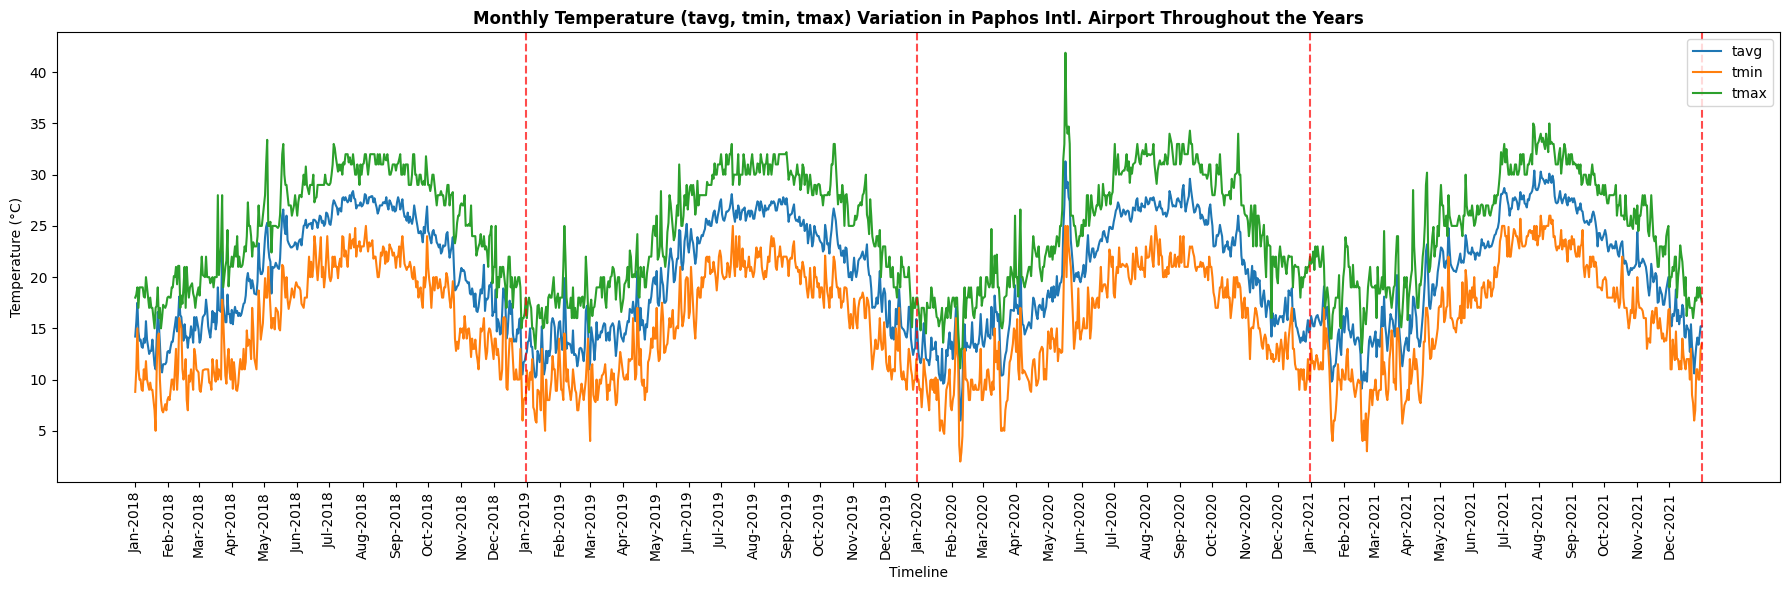

In [439]:
# Convert the 'Date' column to datetime type
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Extract the month and year from the 'Date' column
combined_df['Month'] = combined_df['Date'].dt.month
combined_df['Year'] = combined_df['Date'].dt.year

# Set the figure size
plt.figure(figsize=(18, 6))  # Adjusted figure size for better readability

# Create the line plot with smoothed data
for col in ['tavg', 'tmin', 'tmax']:
    sns.lineplot(data=combined_df, x='Date', y=col, label=col)

# Customize the plot
plt.xlabel('Timeline')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Temperature (tavg, tmin, tmax) Variation in Paphos Intl. Airport Throughout the Years', fontweight='bold')
plt.legend(loc="upper right")

# Format the x-axis ticks to show months with yearly tick marks
monthly_ticks = pd.date_range(start=combined_df['Date'].min(), end=combined_df['Date'].max(), freq='MS')
yearly_ticks = pd.date_range(start=combined_df['Date'].min(), end=combined_df['Date'].max(), freq='Y')

plt.xticks(monthly_ticks, 
           [pd.Timestamp(i).strftime('%b-%Y') for i in monthly_ticks], 
           rotation=90)  # Rotates the x-axis labels for better readability

# Add yearly tick marks
for tick in yearly_ticks:
    plt.axvline(tick, color='red', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

The temperature dynamics at Paphos International Airport present pronounced variations throughout the year, reflecting the region's unique climatic characteristics. The data, encompassing average temperature (tavg), minimum temperature (tmin), and maximum temperature (tmax), reveals discernible seasonal patterns. Typically, Paphos witnesses warmer temperatures during the summer months (May -October), juxtaposed with cooler conditions in the winter (December - February). By scrutinizing these temperature trends spanning multiple years, we can elucidate the region's climatic shifts, understand its seasonal nuances, and discern any evolving patterns that might influence air traffic operations at Paphos International Airport.



#### Q7: Does temperature effect air traffic volume at Paphos International Airport?

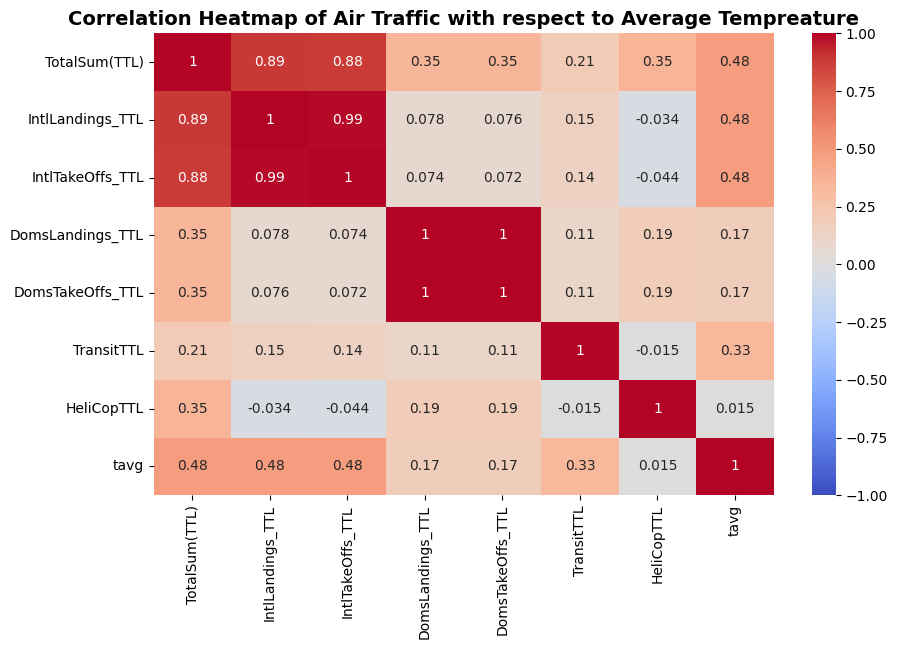

Correlations with respect to tavg:
IntlLandings_TTL    0.482948
IntlTakeOffs_TTL    0.480644
TotalSum(TTL)       0.478371
TransitTTL          0.333032
DomsLandings_TTL    0.174045
DomsTakeOffs_TTL    0.173187
HeliCopTTL          0.015197
Name: tavg, dtype: float64


In [440]:
# Filter the columns you're interested in
selected_columns = ['TotalSum(TTL)', 'IntlLandings_TTL', 'IntlTakeOffs_TTL', 'DomsLandings_TTL', 'DomsTakeOffs_TTL', 'TransitTTL', 'HeliCopTTL']

# Compute the correlation matrix for the selected columns and 'tavg'
corr_matrix_selected = combined_df[selected_columns + ['tavg']].corr()

# Extract correlations with respect to 'tavg'
corr_with_airtraffic_selected = corr_matrix_selected['tavg'].drop('tavg').sort_values(ascending=False)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_selected, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Air Traffic with respect to Average Tempreature', fontsize=14, fontweight='bold')
plt.show()

# Display correlations with respect to 'tavg'
print("Correlations with respect to tavg:")
print(corr_with_airtraffic_selected)

Temperature variations at Paphos International Airport seem to have a more pronounced influence on aviation activities. For the analysis we are using average temperature value "tavg".

The total number of international landings "IntlLandings_TTL" (0.482948), international take-offs "IntlTakeOffs_TTL" (0.480644), thus total air traffic "TotalSum(TTL)" ( 0.478371) also shows a notable positive relationship with average temperature value "tavg". This suggests that as temperatures rise (which indicates to summer season), there's an increase in international aviation activities at Paphos International Airport. Which indicates to the fact that in the summer season lots of tourist visit Paphos for summer vacation as Paphos a coastal city is one of the [most popular](https://cyprus-mail.com/2023/12/23/cyprus-tourism-saw-exponential-surge-in-2022-statistical-service-reports/) tourist destination around the mediteranian sea.

For domestic flight activities takeoffs (0.173187) and landings (0.174045) exhibit a weak positive correlation with average temperature. This suggests a slight increase in domestic aviation operations during warmer periods, but the relationship is not as pronounced as with international activities.

The transit-related metric "TransitTTL" (0.333032) also has a moderate positive correlation with average temperature. This implies that warmer temperatures may be associated with higher transit activities at the airport. With the increase of international flight activities in warmer season, it is evident that number of transit flights also increases.

Helicopter operations "HeliCopTTL" ( 0.015197) at the airport show an almost negligible positive relationship with temperature. This indicates that temperature variations have little to no influence on helicopter activities at Paphos International Airport.

Thus, we can say in summer season when the average temperature is high, due to the region being a popular tourist destination Paphos Internatiol Airport exhibits more international air traffic in the airport during warmer days of summer for the increasing number of tourist. 

#### Q8. Is there any relation between the average sea-level air pressure on the total air traffic of Paphos International Airport?

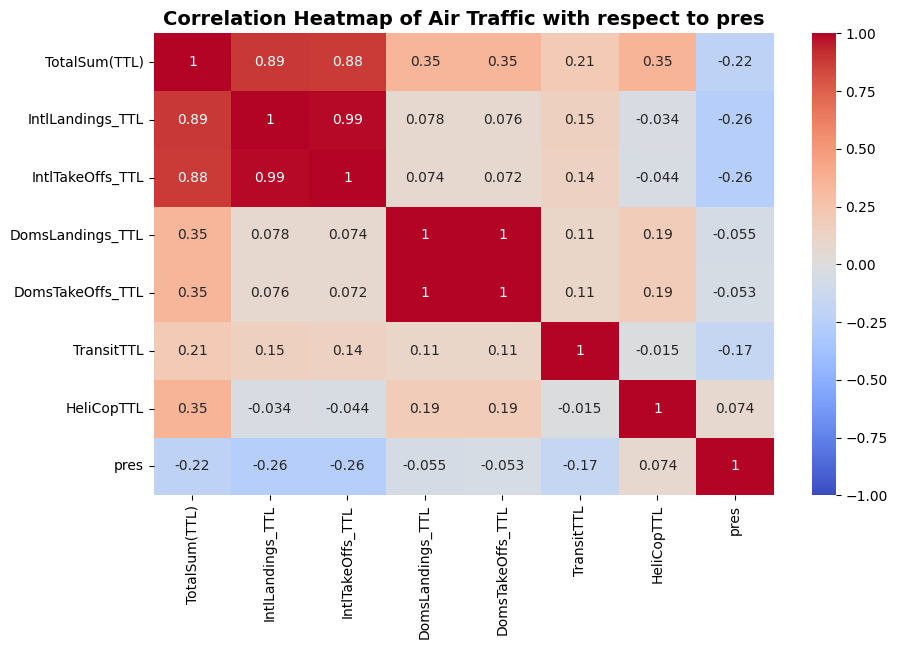

Correlations with respect to pres:
HeliCopTTL          0.074190
DomsTakeOffs_TTL   -0.053482
DomsLandings_TTL   -0.054919
TransitTTL         -0.168174
TotalSum(TTL)      -0.215368
IntlTakeOffs_TTL   -0.261102
IntlLandings_TTL   -0.262926
Name: pres, dtype: float64


In [441]:
# Filter the columns you're interested in
selected_columns = ['TotalSum(TTL)', 'IntlLandings_TTL', 'IntlTakeOffs_TTL', 'DomsLandings_TTL', 'DomsTakeOffs_TTL', 'TransitTTL', 'HeliCopTTL']

# Compute the correlation matrix for the selected columns and 'pres'
corr_matrix_selected = combined_df[selected_columns + ['pres']].corr()

# Extract correlations with respect to 'pres'
corr_with_airtraffic_selected = corr_matrix_selected['pres'].drop('pres').sort_values(ascending=False)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_selected, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Air Traffic with respect to pres', fontsize=14, fontweight='bold')
plt.show()

# Display correlations with respect to 'pres'
print("Correlations with respect to pres:")
print(corr_with_airtraffic_selected)

Atmospheric pressure variations at Paphos International Airport appear to have a more substantial influence.

Both international take-offs "IntlTakeOffs_TTL" (-0.261102) and international landings "IntlLandings_TTL" (-0.262926) show a notable negative correlation with atmospheric pressure. This implies that as atmospheric pressure rises, there is a more pronounced decrease in international flight activities at Paphos International Airport.

As international flight activities is the majority portion of Total flight activity in Paphos International Airport, so the total sum of a total air traffic "TotalSum(TTL)" (-0.215368) exhibit a moderate negative correlation with atmospheric pressure. This suggests that higher atmospheric pressure levels could be associated with decreased overall air traffic at the airport.

Both domestic take-offs "DomsTakeOffs_TTL" (-0.053482) and domestic landings "DomsLandings_TTL" (  -0.054919) have a weak negative correlation with atmospheric pressure. This indicates that as atmospheric pressure increases, there might be a slight decrease in domestic flight operations.

The transit-related metric "TransitTTL" (-0.168174) also exhibit a moderate negative correlation with atmospheric pressure. This suggests that higher atmospheric pressure levels could be associated with decreased transit activities at the airport.

Helicopter operations "HeliCopTTL" (0.074190) at the airport show a slight positive correlation, but it is so small that its negligible. Air pressure for a helicopter depends on various factors such as the type of helicopter, its equipment, and the altitude at which it is flying. However, helicopters are generally capable of operating at altitudes where the air pressure is significantly lower than at sea level.

Thus, we can say that Higher atmospheric pressure levels seem to correlate with reduced flight operations, particularly for international flights.

## 4.2 Conclusion:

Paphos International Airport is located in the charming city of Paphos on the island of Cyprus in the Mediterranean. Over the years, the airport has witnessed fluctuations in air traffic volumes, the airport's air traffic patterns have been notably influenced by global events, such as the COVID-19 pandemic in year 2020, which led to discernible drops in activity. While wind patterns and directions have shown varying correlations with air traffic, their impact remains relatively modest. In contrast, temperature emerges as a significant influencer, especially during the summer months, when the region experiences an influx of tourists. The positive correlation between rising temperatures and increased international flight activities underscores Paphos's appeal as a premier tourist destination. Furthermore, atmospheric pressure, an often-overlooked factor during non-techincal analysis, exhibits a notable negative correlation with flight operations, particularly for international flights. As the aviation industry continues to evolve, understanding these climatic interplays becomes crucial for strategic planning and ensuring the seamless operation of airports like Paphos International.
For future expansion of the work, while the analysis highlighted seasonal variations, a more detailed season by season examination across could offer insights into specific operational challenges and opportunities for Paphos International Airport. Incorporating data on airline schedules, passenger demographics, and global events can provide a more comprehensive understanding of the factors affecting airport traffic. Conducting scenario analysis to evaluate the potential long-term implications of climate change on Paphos International Airport and identify adaptive strategies for the future.